### MACHINE LEARNING MODELS FOR THE BANK MARKETING DATASET (RAW)

First of all, we will perform data curation and preparation. Next, we will apply the following Machine Learning models:

- Linear Regression
- k-Nearest Neighbors(k-NN)
- Support Vector Machines (SVM)
- Classification Trees
- Random Forest
- Ada Boosting
- Gradient Boosting
- Neural Networks(NN)

**Import the necessary libraries:**

We try to eliminate the warnings that come up when some cells are executed:

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("ignore")
warnings.simplefilter('ignore')

Now we import the libraries needed for executing the models and visualize the plots:

In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, make_scorer, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import shap
import matplotlib.pyplot as plt
import seaborn as sns

2023-07-04 09:44:44.195251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 09:44:44.235468: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


**Load the dataset**

In [3]:
df = pd.read_csv("/home/carmen/Escritorio/TFM/ml_anonymization/datasets/bank_dataset/csv/bank-additional-full_raw.csv", sep=";")

**We check that we have loaded the dataset correctly by showing the first 5 rows of the dataset**

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**We explore the original dataset**

In [5]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

**We check if there is any null value to remove it if exists:**

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**We remove duplicate data if there is any**

In [7]:
df.drop_duplicates(inplace=True)

**We remove columns that are not relevant to our analysis:**
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Duration is dropped as the attribute highly affects the outcome of the predictions. This happens beacuse if the duration is cero or any other low value, it means that the call has been really short and no customers subscribed to the banking product. On the other hand, if the call was long enough, it usually means that the client did subscribe to the proposed product. Therefore, this attribute is dropped from the dataset for the analysis.

In [8]:
df = df.drop(["duration", "campaign", "pdays", "previous", "poutcome", "nr.employed"], axis=1)

**First data exploration for understanding the data we have in the dataset:**

We make use of Pandas profiling to generate a complete report that will be relevant for future analysis in working memory:

In [10]:
# forming ProfileReport and save as output.html file
profile = pp.ProfileReport(df)
profile.to_file("dataset_bank_no_anonym_initial_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

We proceed to create more complex graphs that give us more information from the original dataset before we begin to transform the dataset and anonymise it for future analysis.

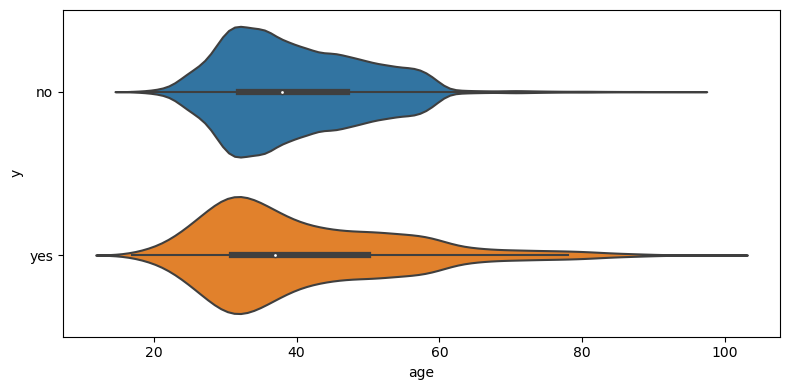

In [9]:
# Selecting all columns except the target ('y')
features_to_plot = ['age']

# Calculate the appropriate figure size based on the number of features
fig_height = len(features_to_plot) * 4
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(8, fig_height))

# Iterate over each feature and generate the violinplot
for i, feature in enumerate(features_to_plot):
    ax = axes[i] if len(features_to_plot) > 1 else axes
    sns.violinplot(data=df, x=feature, y='y', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('y')

# Adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()

**Convert categorical to factors and store in a dictionary all the mapping:**

We discretise the variables in order to better manage the data in the dataset.

In [10]:
df["job"] = df["job"].astype("category").cat.codes
df["marital"] = df["marital"].astype("category").cat.codes
df["education"] = df["education"].astype("category").cat.codes
df["default"] = df["default"].astype("category").cat.codes
df["housing"] = df["housing"].astype("category").cat.codes
df["loan"] = df["loan"].astype("category").cat.codes
df["contact"] = df["contact"].astype("category").cat.codes
df["month"] = df["month"].astype("category").cat.codes
df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
df["y"] = df["y"].astype("category").cat.codes


We inspect the dataset to make sure everything has work properly:

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,0
1,57,7,1,3,1,0,0,1,6,1,1.1,93.994,-36.4,4.857,0
2,37,7,1,3,0,2,0,1,6,1,1.1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,0
4,56,7,1,3,0,0,2,1,6,1,1.1,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,-1.1,94.767,-50.8,1.028,1
41184,46,1,1,5,0,0,0,0,7,0,-1.1,94.767,-50.8,1.028,0
41185,56,5,1,6,0,2,0,0,7,0,-1.1,94.767,-50.8,1.028,0
41186,44,9,1,5,0,0,0,0,7,0,-1.1,94.767,-50.8,1.028,1


Before starting we have to define a random state value in order to achieve reproducibility of the models:

In [12]:
random_seed = 14

**We divide the dataset in train and test**

In [13]:
X = df.drop(["y"], axis=1)
y = df["y"]

# We add stratify for making sure that the random split has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed, stratify=y)

**We check that the shapes of the splitted sets are correct as expected**

In [14]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30882, 14)
X_test shape: (10294, 14)
y_train: (30882,)
y_test shape: (10294,)


**Finally we do the scaling in train and test separately**

We scale variables separately in train and test because this way we avoid biases. In addition, we manage to maintain the relative scale, i.e., all characteristics have a similar scale.

In [15]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We check the new scaled values in the respectivew partitions created:

In [16]:
X_train

array([[0.18518519, 0.        , 0.33333333, ..., 0.1745908 , 0.86610879,
        0.01858989],
       [0.35802469, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.09385627],
       [0.2962963 , 0.81818182, 0.        , ..., 0.48441154, 0.61506276,
        0.98118341],
       ...,
       [0.2345679 , 0.09090909, 0.33333333, ..., 0.26968044, 0.19246862,
        0.14894582],
       [0.38271605, 0.63636364, 0.33333333, ..., 0.66913484, 0.33891213,
        0.98254364],
       [0.03703704, 0.18181818, 0.66666667, ..., 0.69875292, 0.60251046,
        0.95737928]])

In [17]:
X_test

array([[0.12345679, 0.90909091, 0.33333333, ..., 0.88230709, 0.37656904,
        0.95896622],
       [0.17283951, 0.        , 0.33333333, ..., 0.48441154, 0.61506276,
        0.98118341],
       [0.14814815, 0.        , 0.66666667, ..., 0.69875292, 0.60251046,
        0.95715257],
       ...,
       [0.38271605, 0.63636364, 0.66666667, ..., 0.69875292, 0.60251046,
        0.95737928],
       [0.24691358, 0.        , 0.66666667, ..., 0.66913484, 0.33891213,
        0.9809567 ],
       [0.2345679 , 0.09090909, 0.66666667, ..., 0.69875292, 0.60251046,
        0.95715257]])

### VIOLINPLOTS:

Before we start analysing the performance of the models, let's do some more plotting. We will start by making some violinplots for each of the relevant variables. In this way we can observe the distribution of each of our variables, and confront them with the target variable:

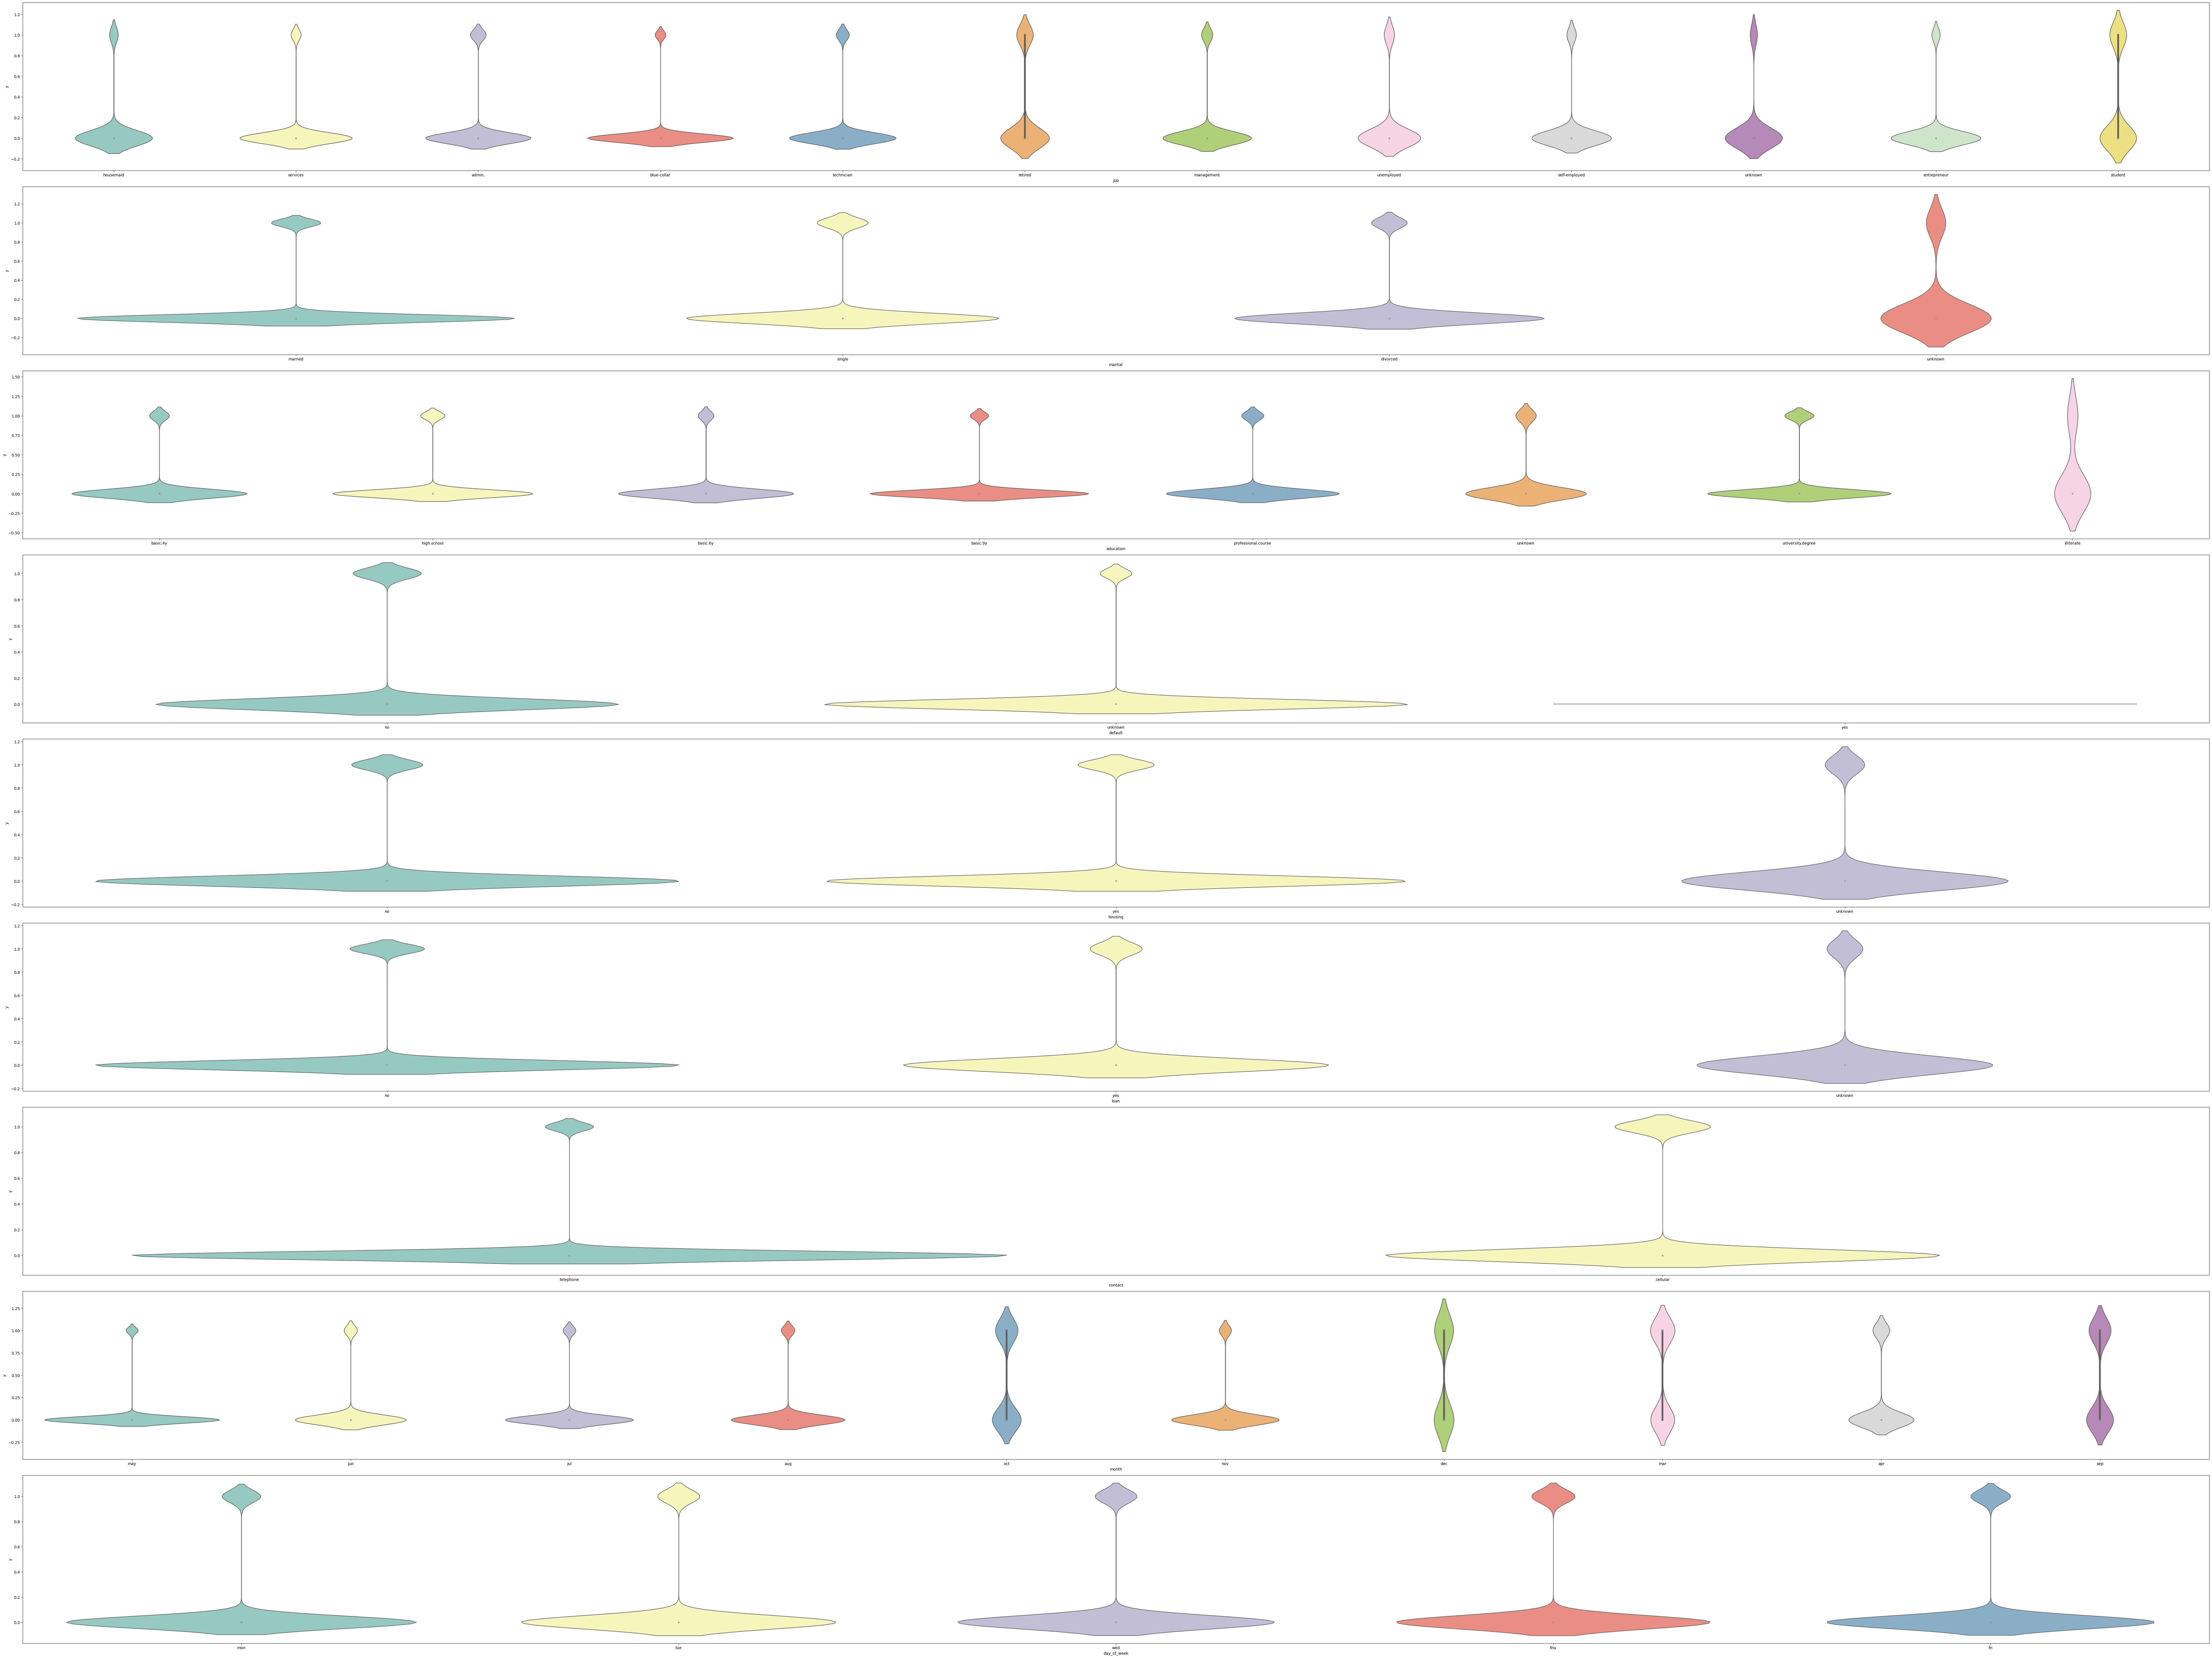

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to map the encoded values back to their original labels
job_mapping = {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired',
               6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}
marital_mapping = {0: 'divorced', 1: 'married', 2: 'single', 3: 'unknown'}
education_mapping = {0: 'basic.4y', 1: 'basic.6y', 2: 'basic.9y', 3: 'high.school', 4: 'illiterate',
                     5: 'professional.course', 6: 'university.degree', 7: 'unknown'}
default_mapping = {0: 'no', 1: 'unknown', 2: 'yes'}
housing_mapping = {0: 'no', 1: 'unknown', 2: 'yes'}
loan_mapping = {0: 'no', 1: 'unknown', 2: 'yes'}
contact_mapping = {0: 'cellular', 1: 'telephone'}
month_mapping = {0: 'apr', 1: 'aug', 2: 'dec', 3: 'jul', 4: 'jun', 5: 'mar', 6: 'may', 7: 'nov', 8: 'oct', 9: 'sep'}
day_of_week_mapping = {0: 'fri', 1: 'mon', 2: 'thu', 3: 'tue', 4: 'wed'}
y_mapping = {0: 'no', 1: 'yes'}

# Apply the mapping to the DataFrame
df["job"] = df["job"].map(job_mapping)
df["marital"] = df["marital"].map(marital_mapping)
df["education"] = df["education"].map(education_mapping)
df["default"] = df["default"].map(default_mapping)
df["housing"] = df["housing"].map(housing_mapping)
df["loan"] = df["loan"].map(loan_mapping)
df["contact"] = df["contact"].map(contact_mapping)
df["month"] = df["month"].map(month_mapping)
df["day_of_week"] = df["day_of_week"].map(day_of_week_mapping)

# Set the features to plot
features_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']

# Create a figure with subplots for each feature
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(80, 60))

# Iterate over each feature and generate the violin plot
for i, feature in enumerate(features_to_plot):
    ax = axes[i] if len(features_to_plot) > 1 else axes
    sns.violinplot(data=df, x=feature, y='y', ax=ax, palette='Set3')
    ax.set_xlabel(feature)
    ax.set_ylabel('y')

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

With the generated plots we can mainly see what the dispersion is. However, as most of the variables, except for age which was previously separated, only take a value of 0 or 1, we can represent it in a better way. For this purpose it is more appropriate to use bar plots:

### BAR PLOTS:

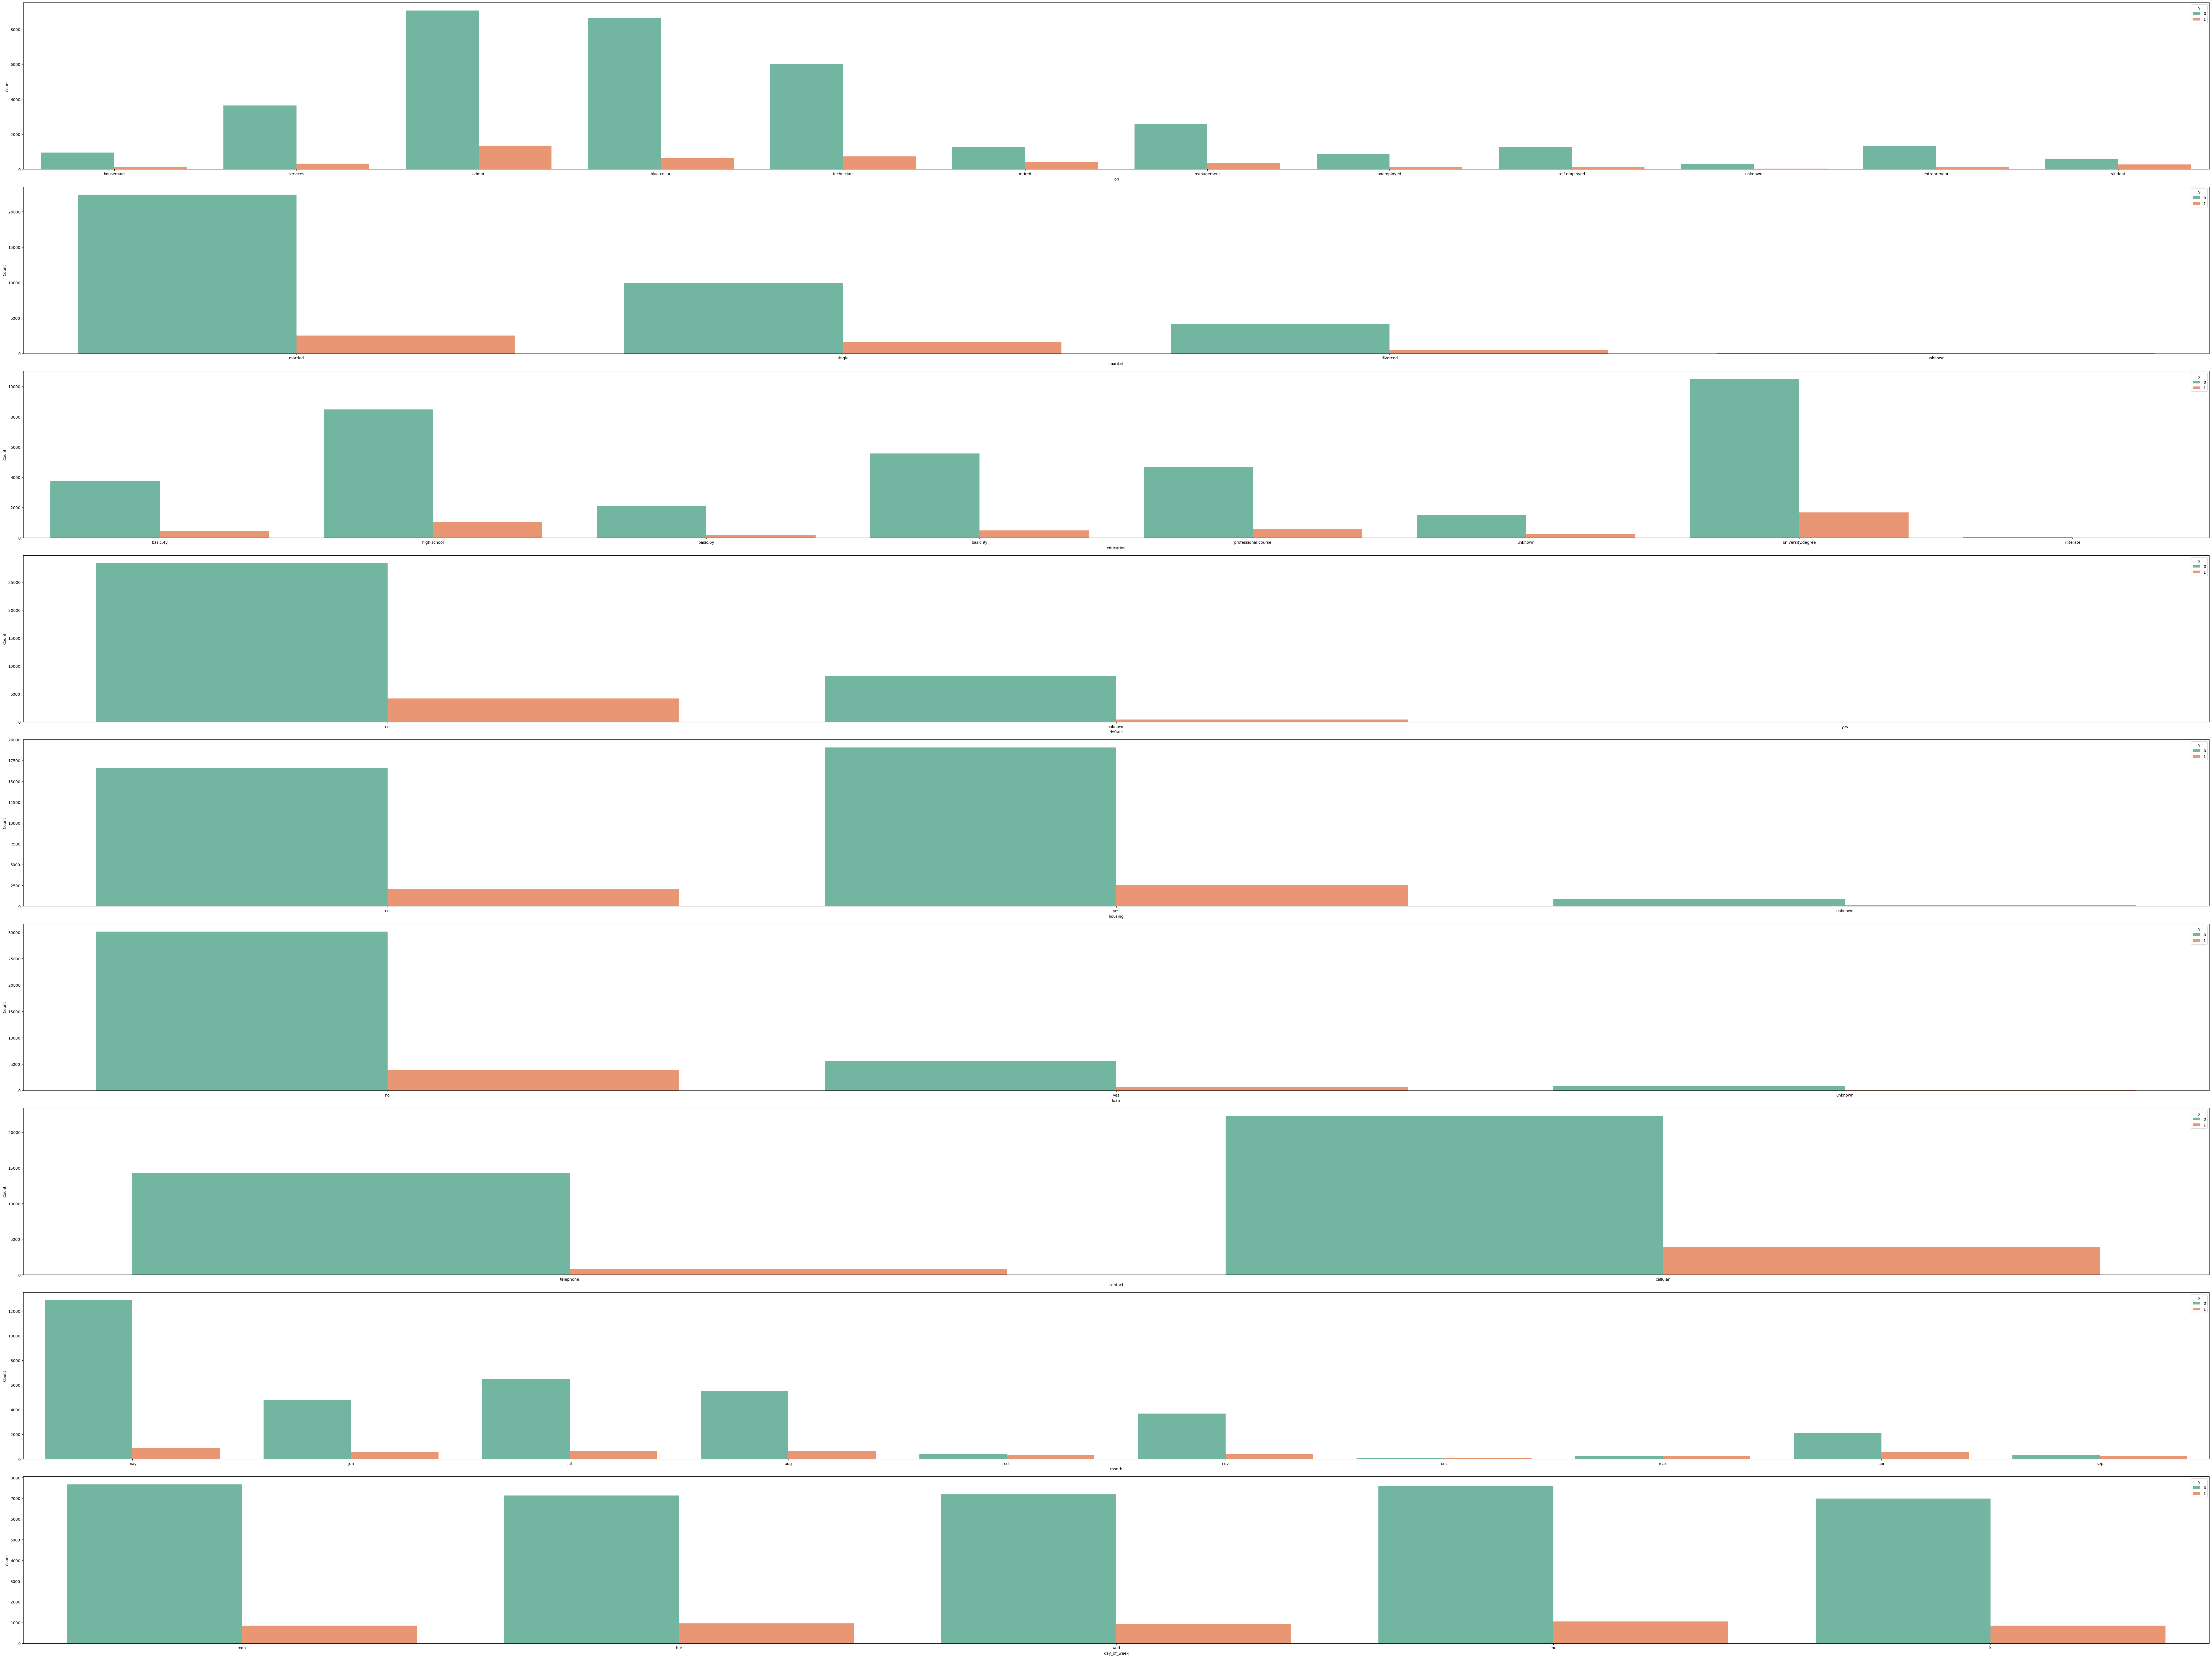

In [21]:
# Create a figure with subplots for each feature
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(80, 60))

# Iterate over each feature and generate the bar plot
for i, feature in enumerate(features_to_plot):
    ax = axes[i] if len(features_to_plot) > 1 else axes
    sns.countplot(data=df, x=feature, hue='y', ax=ax, palette='Set2')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

With these new barplots we can represent how our variables are distributed at source in a better way. From the occurrence of each of the subcategories of the variables, as well as whether these individuals take value 0 or 1 in the target variable "y", to the occurrence of each of the subcategories of the variables, as well as whether these individuals take value 0 or 1 in the target variable "y".

**We start evaluating the proposed models:**


### LOGISTIC REGRESSION:  
#### Linear regression method for binary classification problems

 We create and train the logistic regression model

In [22]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

We make the predictions on the test partition:

In [23]:
y_pred_lr = model_lr.predict(X_test)

We evaluate the model obtained:

In [24]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", report_lr)

Accuracy: 0.8888673013405868
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9134
           1       0.52      0.16      0.24      1160

    accuracy                           0.89     10294
   macro avg       0.71      0.57      0.59     10294
weighted avg       0.86      0.89      0.86     10294



We illustrate the results obtained by drawaing the ROC curve and the confusion matrix:

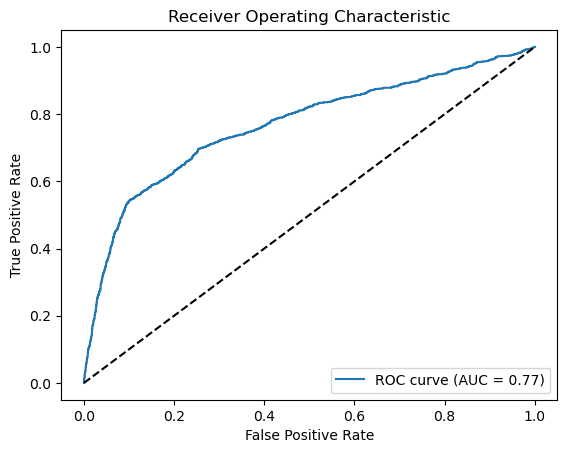

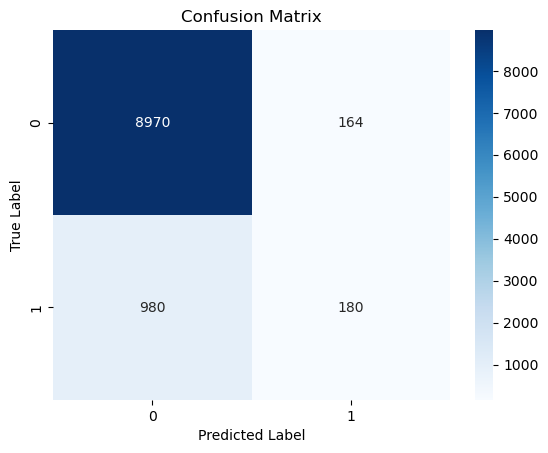

In [25]:
# Generate ROC curve and calculate AUC
y_pred_prob_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Plot ROC curve
plt.plot(fpr_lr, tpr_lr, label='ROC curve (AUC = {:.2f})'.format(auc_lr))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Visualize confusion matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
fig_lr = plt.gcf()  # Obtener la figura actual
plt.show()

### KNN (K k nearest neighbours)

We choose the different parameters for gridSearch

In [26]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

We create the classifier

In [39]:
knn = KNeighborsClassifier()


We create the GridSearch object

In [ ]:
# refit true, to retrain with all data
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, refit=True)

We make the model fit

In [30]:
grid_search_knn.fit(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe2215b68c0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe2215b60e0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe2215b60e0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe2215b60e0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe2215b60e0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe2215b60e0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [31]:
print("Best hyperparameters:", grid_search_knn.best_params_)
print("Accuracy score:", grid_search_knn.best_score_)

Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy score: 0.8905834971115478


Get the best model and its predictions

In [32]:
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe221f65000>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Evaluate the best model over test partition

In [33]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("Best Parameters:", grid_search_knn.best_params_)
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

Best Parameters: {'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.8899358849815426
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.53      0.21      0.30      1160

    accuracy                           0.89     10294
   macro avg       0.72      0.59      0.62     10294
weighted avg       0.86      0.89      0.87     10294



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe2215b64d0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


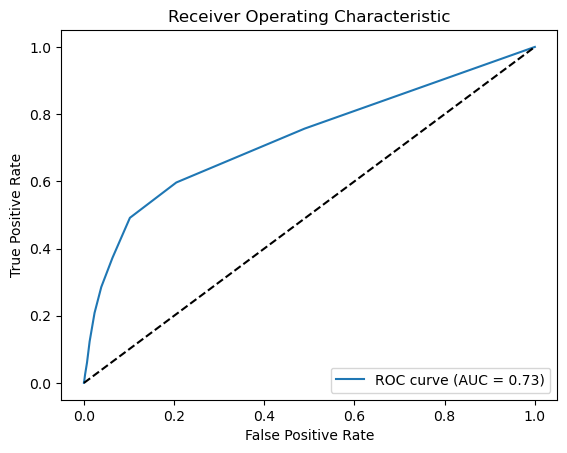

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe222145480>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


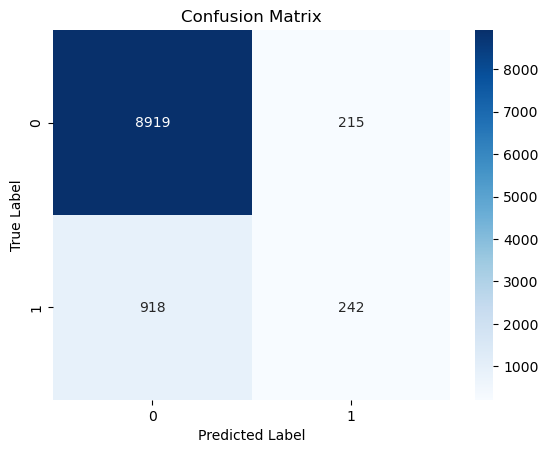

In [35]:
# Generate ROC curve and calculate AUC
y_pred_prob_knn = best_model_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

# Plot ROC curve
plt.plot(fpr_knn, tpr_knn, label='ROC curve (AUC = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_knn = best_model_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize confusion matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### CLASSIFICATION TREES

We choose the different parameters for gridSearch

In [36]:
param_grid_ct = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

We create the model classifier

In [40]:
model_ct = DecisionTreeClassifier(random_state=random_seed)

We create the GridSearch object

In [41]:
grid_search_ct = GridSearchCV(model_ct, param_grid_ct, cv=5)

We make the model fit

In [42]:
grid_search_ct.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=14),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

We obtain and store the best model and the prediction

In [43]:
best_model_ct = grid_search_ct.best_estimator_
y_pred_ct = best_model_ct.predict(X_test)

Evaluate the best model

In [44]:
accuracy_ct = accuracy_score(y_test, y_pred_ct)
report_ct = classification_report(y_test, y_pred_ct)
print("Best Parameters:", grid_search_ct.best_params_)
print("Accuracy:", accuracy_ct)
print("Classification Report:\n", report_ct)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8934330678064892
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9134
           1       0.59      0.18      0.27      1160

    accuracy                           0.89     10294
   macro avg       0.75      0.58      0.61     10294
weighted avg       0.87      0.89      0.87     10294



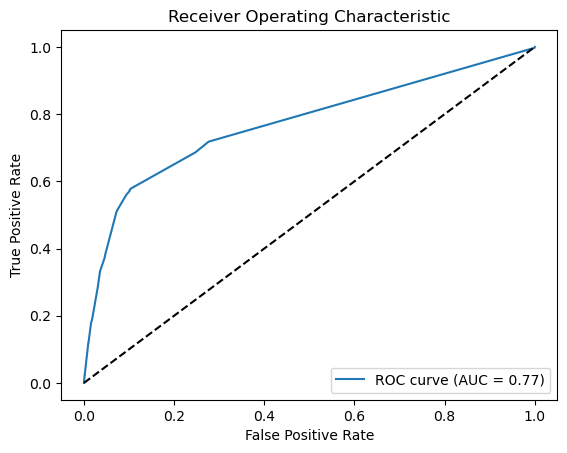

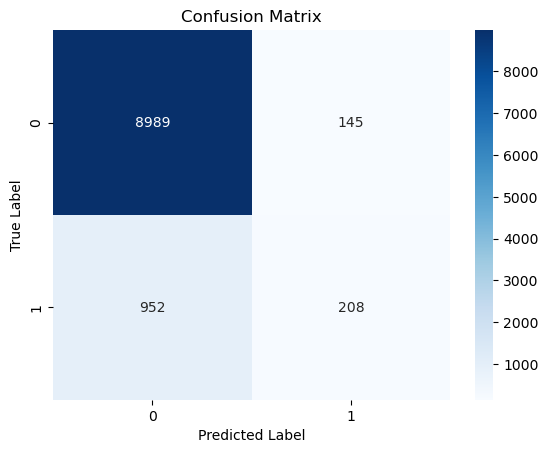

In [45]:
# Generate ROC curve and calculate AUC
y_pred_prob_ct = best_model_ct.predict_proba(X_test)[:, 1]
fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_test, y_pred_prob_ct)
auc_ct = roc_auc_score(y_test, y_pred_prob_ct)

# Plot ROC curve
plt.plot(fpr_ct, tpr_ct, label='ROC curve (AUC = {:.2f})'.format(auc_ct))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_ct = best_model_ct.predict(X_test)
cm_ct = confusion_matrix(y_test, y_pred_ct)

# Visualize confusion matrix
sns.heatmap(cm_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### RANDOM FOREST

We choose the different parameters for gridSearch

In [46]:
param_grid_rf = {"n_estimators": [50, 100, 200],
              "max_depth": [None, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}

We create the classifier

In [47]:
rfc = RandomForestClassifier(random_state=random_seed)

We create the GridSearch object

In [48]:
grid_search_rf = GridSearchCV(rfc, param_grid_rf, cv=5)

We make the model fit

In [49]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [50]:
print("Best hyperparameters:", grid_search_rf.best_params_)
print("Accuracy score:", grid_search_rf.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy score: 0.8954407479358911


In [51]:
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [52]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8943073635127259
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.58      0.23      0.33      1160

    accuracy                           0.89     10294
   macro avg       0.74      0.60      0.64     10294
weighted avg       0.87      0.89      0.87     10294



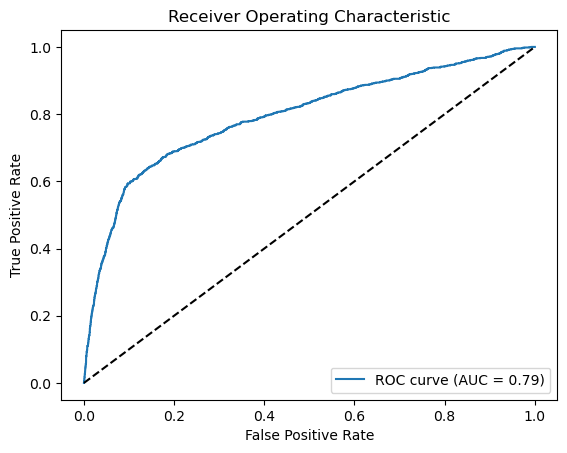

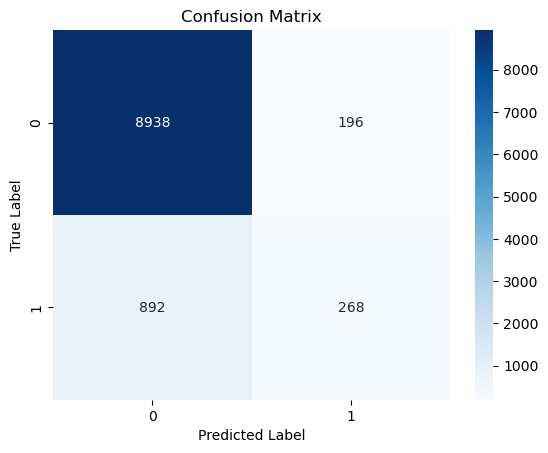

In [53]:
# Generate ROC curve and calculate AUC
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, label='ROC curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_rf = best_model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### SVM (Support Vector Machine)

In [54]:
param_grid_svm = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "gamma": ["scale", "auto"]}

In [55]:
svm = SVC()

In [56]:
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)

In [57]:
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [58]:
print("Best hyperparameters:", grid_search_svm.best_params_)
print("Accuracy score:", grid_search_svm.best_score_)

Best hyperparameters: {'C': 0.25, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy score: 0.8937893245962585


In [59]:
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

In [60]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("Best Parameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Best Parameters: {'C': 0.25, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8919759082960949
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9134
           1       0.56      0.18      0.27      1160

    accuracy                           0.89     10294
   macro avg       0.73      0.58      0.61     10294
weighted avg       0.87      0.89      0.87     10294



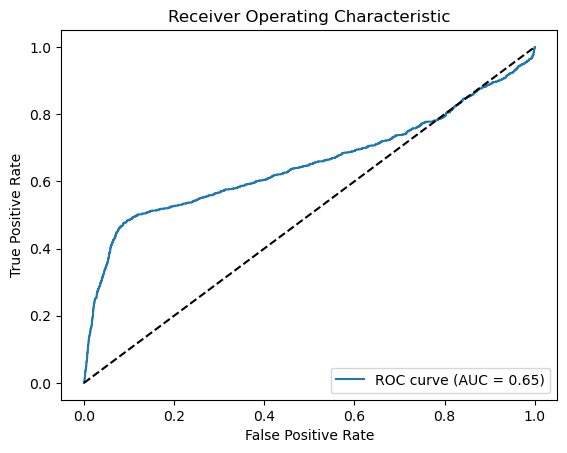

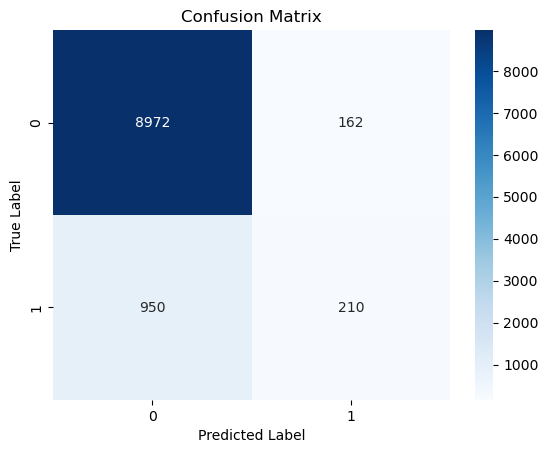

In [61]:
# Generate decision scores
y_pred_scores_svm = best_model_svm.decision_function(X_test)

# Calculate FPR, TPR, and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_scores_svm)
auc_svm = roc_auc_score(y_test, y_pred_scores_svm)

# Plot ROC curve
plt.plot(fpr_svm, tpr_svm, label='ROC curve (AUC = {:.2f})'.format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_svm = best_model_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### NEURAL NETWORK:

We start creating the model function

In [62]:
def create_model_nn(hidden_units=128):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid_nn = {
    'hidden_units': [64, 128, 256],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the model
model_nn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)

# Perform grid search
grid_search_nn = GridSearchCV(model_nn, param_grid_nn, cv=3)


In [63]:
grid_search_nn.fit(X_train, y_train)

# Get the best parameters
best_params_nn = grid_search_nn.best_params_
best_params_nn

Epoch 1/10


2023-07-04 02:43:43.179684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1287/1287 [==============================] - 1s 734us/step - loss: 0.2998 - accuracy: 0.8893
Epoch 2/10
1287/1287 [==============================] - 1s 763us/step - loss: 0.2864 - accuracy: 0.8939
Epoch 3/10
1287/1287 [==============================] - 1s 770us/step - loss: 0.2845 - accuracy: 0.8946
Epoch 4/10
1287/1287 [==============================] - 1s 726us/step - loss: 0.2836 - accuracy: 0.8949
Epoch 5/10
1287/1287 [==============================] - 1s 732us/step - loss: 0.2817 - accuracy: 0.8960
Epoch 6/10
1287/1287 [==============================] - 1s 728us/step - loss: 0.2824 - accuracy: 0.8957
Epoch 7/10
1287/1287 [==============================] - 1s 725us/step - loss: 0.2813 - accuracy: 0.8959
Epoch 8/10
1287/1287 [==============================] - 1s 721us/step - loss: 0.2807 - accuracy: 0.8960
Epoch 9/10
1287/1287 [==============================] - 1s 727us/step - loss: 0.2794 - accuracy: 0.8963
Epoch 10/10
644/644 [==============================] - 0s 512us/step - loss

1287/1287 [==============================] - 1s 805us/step - loss: 0.2758 - accuracy: 0.8975
Epoch 19/20
1287/1287 [==============================] - 1s 814us/step - loss: 0.2745 - accuracy: 0.8980
Epoch 20/20
644/644 [==============================] - 0s 557us/step - loss: 0.2900 - accuracy: 0.8912
Epoch 1/20
1287/1287 [==============================] - 1s 773us/step - loss: 0.3021 - accuracy: 0.8879
Epoch 2/20
1287/1287 [==============================] - 1s 811us/step - loss: 0.2871 - accuracy: 0.8935
Epoch 3/20
1287/1287 [==============================] - 1s 814us/step - loss: 0.2860 - accuracy: 0.8936
Epoch 4/20
1287/1287 [==============================] - 1s 813us/step - loss: 0.2843 - accuracy: 0.8946
Epoch 5/20
1287/1287 [==============================] - 1s 814us/step - loss: 0.2837 - accuracy: 0.8945
Epoch 6/20
1287/1287 [==============================] - 1s 818us/step - loss: 0.2827 - accuracy: 0.8938
Epoch 7/20
1287/1287 [==============================] - 1s 825us/step - los

1287/1287 [==============================] - 1s 834us/step - loss: 0.2764 - accuracy: 0.8971
Epoch 14/20
1287/1287 [==============================] - 1s 833us/step - loss: 0.2753 - accuracy: 0.8979
Epoch 15/20
1287/1287 [==============================] - 1s 841us/step - loss: 0.2744 - accuracy: 0.8980
Epoch 16/20
1287/1287 [==============================] - 1s 842us/step - loss: 0.2731 - accuracy: 0.8976
Epoch 17/20
1287/1287 [==============================] - 1s 833us/step - loss: 0.2721 - accuracy: 0.8986
Epoch 18/20
1287/1287 [==============================] - 1s 837us/step - loss: 0.2717 - accuracy: 0.8994
Epoch 19/20
1287/1287 [==============================] - 1s 840us/step - loss: 0.2701 - accuracy: 0.8998
Epoch 20/20
644/644 [==============================] - 0s 568us/step - loss: 0.2912 - accuracy: 0.8901
Epoch 1/20
1287/1287 [==============================] - 1s 797us/step - loss: 0.3056 - accuracy: 0.8859
Epoch 2/20
1287/1287 [==============================] - 1s 844us/step 

1287/1287 [==============================] - 1s 839us/step - loss: 0.2776 - accuracy: 0.8977
Epoch 14/30
1287/1287 [==============================] - 1s 829us/step - loss: 0.2767 - accuracy: 0.8981
Epoch 15/30
1287/1287 [==============================] - 1s 844us/step - loss: 0.2757 - accuracy: 0.8981
Epoch 16/30
1287/1287 [==============================] - 1s 837us/step - loss: 0.2748 - accuracy: 0.8991
Epoch 17/30
1287/1287 [==============================] - 1s 835us/step - loss: 0.2742 - accuracy: 0.8991
Epoch 18/30
1287/1287 [==============================] - 1s 834us/step - loss: 0.2737 - accuracy: 0.8988
Epoch 19/30
1287/1287 [==============================] - 1s 836us/step - loss: 0.2727 - accuracy: 0.8990
Epoch 20/30
1287/1287 [==============================] - 1s 834us/step - loss: 0.2716 - accuracy: 0.8995
Epoch 21/30
1287/1287 [==============================] - 1s 840us/step - loss: 0.2708 - accuracy: 0.8994
Epoch 22/30
1287/1287 [==============================] - 1s 830us/s

1287/1287 [==============================] - 1s 843us/step - loss: 0.2777 - accuracy: 0.8982
Epoch 15/30
1287/1287 [==============================] - 1s 846us/step - loss: 0.2768 - accuracy: 0.8969
Epoch 16/30
1287/1287 [==============================] - 1s 845us/step - loss: 0.2759 - accuracy: 0.8983
Epoch 17/30
1287/1287 [==============================] - 1s 841us/step - loss: 0.2752 - accuracy: 0.8975
Epoch 18/30
1287/1287 [==============================] - 1s 844us/step - loss: 0.2742 - accuracy: 0.8986
Epoch 19/30
1287/1287 [==============================] - 1s 848us/step - loss: 0.2735 - accuracy: 0.8989
Epoch 20/30
1287/1287 [==============================] - 1s 841us/step - loss: 0.2727 - accuracy: 0.8996
Epoch 21/30
1287/1287 [==============================] - 1s 843us/step - loss: 0.2715 - accuracy: 0.8997
Epoch 22/30
1287/1287 [==============================] - 1s 845us/step - loss: 0.2705 - accuracy: 0.9003
Epoch 23/30
1287/1287 [==============================] - 1s 856us/s

644/644 [==============================] - 1s 812us/step - loss: 0.2890 - accuracy: 0.8938
Epoch 3/20
644/644 [==============================] - 1s 821us/step - loss: 0.2875 - accuracy: 0.8935
Epoch 4/20
644/644 [==============================] - 1s 828us/step - loss: 0.2858 - accuracy: 0.8939
Epoch 5/20
644/644 [==============================] - 1s 824us/step - loss: 0.2855 - accuracy: 0.8947
Epoch 6/20
644/644 [==============================] - 1s 829us/step - loss: 0.2844 - accuracy: 0.8944
Epoch 7/20
644/644 [==============================] - 1s 829us/step - loss: 0.2845 - accuracy: 0.8940
Epoch 8/20
644/644 [==============================] - 1s 825us/step - loss: 0.2832 - accuracy: 0.8949
Epoch 9/20
644/644 [==============================] - 1s 835us/step - loss: 0.2823 - accuracy: 0.8951
Epoch 10/20
644/644 [==============================] - 1s 831us/step - loss: 0.2815 - accuracy: 0.8952
Epoch 11/20
644/644 [==============================] - 1s 827us/step - loss: 0.2811 - accura

644/644 [==============================] - 1s 828us/step - loss: 0.2763 - accuracy: 0.8982
Epoch 16/30
644/644 [==============================] - 1s 827us/step - loss: 0.2774 - accuracy: 0.8972
Epoch 17/30
644/644 [==============================] - 1s 818us/step - loss: 0.2758 - accuracy: 0.8989
Epoch 18/30
644/644 [==============================] - 1s 820us/step - loss: 0.2746 - accuracy: 0.8979
Epoch 19/30
644/644 [==============================] - 1s 811us/step - loss: 0.2738 - accuracy: 0.8982
Epoch 20/30
644/644 [==============================] - 1s 825us/step - loss: 0.2731 - accuracy: 0.8976
Epoch 21/30
644/644 [==============================] - 1s 851us/step - loss: 0.2717 - accuracy: 0.8994
Epoch 22/30
644/644 [==============================] - 1s 825us/step - loss: 0.2717 - accuracy: 0.8994
Epoch 23/30
644/644 [==============================] - 1s 823us/step - loss: 0.2708 - accuracy: 0.8992
Epoch 24/30
644/644 [==============================] - 1s 820us/step - loss: 0.2700 -

644/644 [==============================] - 1s 870us/step - loss: 0.2702 - accuracy: 0.9014
Epoch 21/30
644/644 [==============================] - 1s 859us/step - loss: 0.2690 - accuracy: 0.8993
Epoch 22/30
644/644 [==============================] - 1s 859us/step - loss: 0.2685 - accuracy: 0.9014
Epoch 23/30
644/644 [==============================] - 1s 856us/step - loss: 0.2671 - accuracy: 0.9014
Epoch 24/30
644/644 [==============================] - 1s 881us/step - loss: 0.2670 - accuracy: 0.9022
Epoch 25/30
644/644 [==============================] - 1s 855us/step - loss: 0.2652 - accuracy: 0.9020
Epoch 26/30
644/644 [==============================] - 1s 856us/step - loss: 0.2641 - accuracy: 0.9034
Epoch 27/30
644/644 [==============================] - 1s 851us/step - loss: 0.2632 - accuracy: 0.9037
Epoch 28/30
644/644 [==============================] - 1s 857us/step - loss: 0.2620 - accuracy: 0.9028
Epoch 29/30
644/644 [==============================] - 1s 874us/step - loss: 0.2601 -

322/322 [==============================] - 1s 805us/step - loss: 0.3094 - accuracy: 0.8889
Epoch 2/10
322/322 [==============================] - 0s 789us/step - loss: 0.2893 - accuracy: 0.8929
Epoch 3/10
322/322 [==============================] - 0s 832us/step - loss: 0.2881 - accuracy: 0.8926
Epoch 4/10
322/322 [==============================] - 0s 838us/step - loss: 0.2860 - accuracy: 0.8944
Epoch 5/10
322/322 [==============================] - 0s 862us/step - loss: 0.2848 - accuracy: 0.8945
Epoch 6/10
322/322 [==============================] - 0s 858us/step - loss: 0.2842 - accuracy: 0.8949
Epoch 7/10
322/322 [==============================] - 0s 869us/step - loss: 0.2838 - accuracy: 0.8944
Epoch 8/10
322/322 [==============================] - 0s 864us/step - loss: 0.2824 - accuracy: 0.8954
Epoch 9/10
322/322 [==============================] - 0s 862us/step - loss: 0.2821 - accuracy: 0.8960
Epoch 10/10
161/161 [==============================] - 0s 596us/step - loss: 0.2883 - accurac

322/322 [==============================] - 0s 873us/step - loss: 0.2805 - accuracy: 0.8957
Epoch 13/20
322/322 [==============================] - 0s 883us/step - loss: 0.2801 - accuracy: 0.8961
Epoch 14/20
322/322 [==============================] - 0s 853us/step - loss: 0.2790 - accuracy: 0.8968
Epoch 15/20
322/322 [==============================] - 0s 864us/step - loss: 0.2788 - accuracy: 0.8965
Epoch 16/20
322/322 [==============================] - 0s 858us/step - loss: 0.2778 - accuracy: 0.8971
Epoch 17/20
322/322 [==============================] - 0s 861us/step - loss: 0.2772 - accuracy: 0.8979
Epoch 18/20
322/322 [==============================] - 0s 862us/step - loss: 0.2767 - accuracy: 0.8964
Epoch 19/20
322/322 [==============================] - 0s 855us/step - loss: 0.2758 - accuracy: 0.8982
Epoch 20/20
161/161 [==============================] - 0s 619us/step - loss: 0.2881 - accuracy: 0.8921
Epoch 1/20
322/322 [==============================] - 1s 871us/step - loss: 0.3154 - 

322/322 [==============================] - 0s 839us/step - loss: 0.2727 - accuracy: 0.8995
Epoch 27/30
322/322 [==============================] - 0s 854us/step - loss: 0.2717 - accuracy: 0.8992
Epoch 28/30
322/322 [==============================] - 0s 849us/step - loss: 0.2708 - accuracy: 0.9002
Epoch 29/30
322/322 [==============================] - 0s 866us/step - loss: 0.2715 - accuracy: 0.9003
Epoch 30/30
161/161 [==============================] - 0s 615us/step - loss: 0.2887 - accuracy: 0.8903
Epoch 1/30
322/322 [==============================] - 1s 816us/step - loss: 0.3069 - accuracy: 0.8886
Epoch 2/30
322/322 [==============================] - 0s 803us/step - loss: 0.2864 - accuracy: 0.8943
Epoch 3/30
322/322 [==============================] - 0s 819us/step - loss: 0.2845 - accuracy: 0.8948
Epoch 4/30
322/322 [==============================] - 0s 863us/step - loss: 0.2838 - accuracy: 0.8958
Epoch 5/30
322/322 [==============================] - 0s 851us/step - loss: 0.2834 - accu

161/161 [==============================] - 0s 628us/step - loss: 0.2796 - accuracy: 0.8968
Epoch 1/30
322/322 [==============================] - 1s 880us/step - loss: 0.3077 - accuracy: 0.8888
Epoch 2/30
322/322 [==============================] - 0s 852us/step - loss: 0.2897 - accuracy: 0.8931
Epoch 3/30
322/322 [==============================] - 0s 867us/step - loss: 0.2874 - accuracy: 0.8938
Epoch 4/30
322/322 [==============================] - 0s 917us/step - loss: 0.2859 - accuracy: 0.8929
Epoch 5/30
322/322 [==============================] - 0s 915us/step - loss: 0.2851 - accuracy: 0.8939
Epoch 6/30
322/322 [==============================] - 0s 911us/step - loss: 0.2853 - accuracy: 0.8946
Epoch 7/30
322/322 [==============================] - 0s 908us/step - loss: 0.2839 - accuracy: 0.8947
Epoch 8/30
322/322 [==============================] - 0s 916us/step - loss: 0.2828 - accuracy: 0.8946
Epoch 9/30
322/322 [==============================] - 0s 937us/step - loss: 0.2830 - accuracy

{'batch_size': 16, 'epochs': 10, 'hidden_units': 64}

In [64]:
best_model_nn = create_model_nn(best_params_nn['hidden_units'])
best_model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_nn.fit(X_train, y_train, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'])

Epoch 1/10
1931/1931 [==============================] - 2s 756us/step - loss: 0.2974 - accuracy: 0.8901
Epoch 2/10
1931/1931 [==============================] - 1s 739us/step - loss: 0.2886 - accuracy: 0.8923
Epoch 3/10
1931/1931 [==============================] - 1s 737us/step - loss: 0.2874 - accuracy: 0.8936
Epoch 4/10
1931/1931 [==============================] - 1s 741us/step - loss: 0.2853 - accuracy: 0.8947
Epoch 5/10
1931/1931 [==============================] - 1s 739us/step - loss: 0.2847 - accuracy: 0.8941
Epoch 6/10
1931/1931 [==============================] - 1s 746us/step - loss: 0.2839 - accuracy: 0.8940
Epoch 7/10
1931/1931 [==============================] - 1s 736us/step - loss: 0.2832 - accuracy: 0.8951
Epoch 8/10
1931/1931 [==============================] - 1s 750us/step - loss: 0.2824 - accuracy: 0.8950
Epoch 9/10
1931/1931 [==============================] - 1s 764us/step - loss: 0.2825 - accuracy: 0.8942
Epoch 10/10
1931/1931 [==============================] - 1s 745u

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob_nn = best_model_nn.predict(X_test)
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print('Accuracy: %.2f' % (accuracy_nn*100))
print('Precision: %.2f' % (precision_nn*100))
print('Recall: %.2f' % (recall_nn*100))
print('F1-score: %.2f' % (f1_nn*100))

322/322 [==============================] - 0s 451us/step
Accuracy: 89.21
Precision: 55.76
Recall: 20.43
F1-score: 29.91


In [66]:
print("Best Parameters: ", best_params_nn)

# Evaluate the model
print(f'Test Accuracy: {accuracy_nn*100:.2f}%')

Best Parameters:  {'batch_size': 16, 'epochs': 10, 'hidden_units': 64}
Test Accuracy: 89.21%


322/322 [==============================] - 0s 471us/step


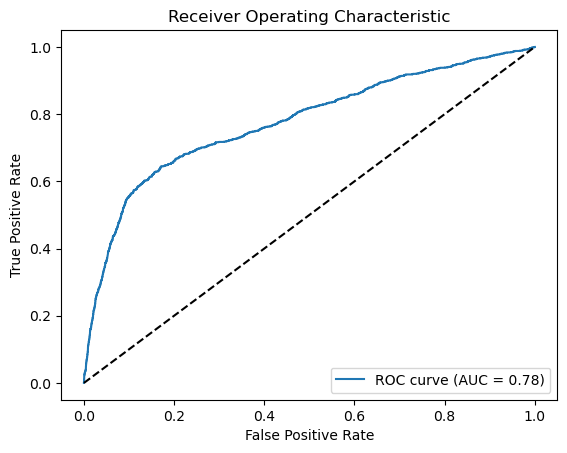

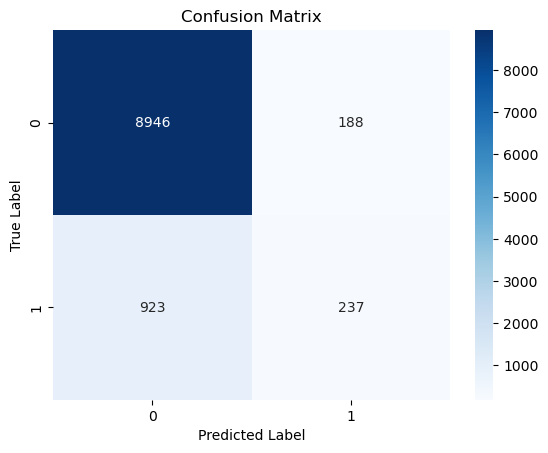

In [67]:
y_pred_prob_nn = best_model_nn.predict(X_test)

# Generate ROC curve and calculate AUC
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

# Plot ROC curve
plt.plot(fpr_nn, tpr_nn, label='ROC curve (AUC = {:.2f})'.format(auc_nn))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Apply thresholds
umbral = 0.5
y_pred_discret_nn = np.where(y_pred_prob_nn >= umbral, 1, 0)

# Create confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_discret_nn)

# Visualize confusion matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### AdaBoost (Adaptative Boosting):

In [68]:
# Create the base estimator
base_estimator_ab = DecisionTreeClassifier()

# Create the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator_ab)

# Define the parameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0]  
}


# Perform grid search for AdaBoost
grid_search_ab = GridSearchCV(ada_boost, param_grid_ab, cv=3)
grid_search_ab.fit(X_train, y_train)

# Get the best AdaBoost model and its performance
best_ada_boost = grid_search_ab.best_estimator_
best_params_ab = grid_search_ab.best_params_
best_score_ab = grid_search_ab.best_score_

# Train the best AdaBoost model with all data
best_ada_boost.fit(X_train, y_train)

# Evaluate the best AdaBoost model
test_accuracy_ab = best_ada_boost.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy_ab*100:.2f}%')

Test Accuracy: 86.08%


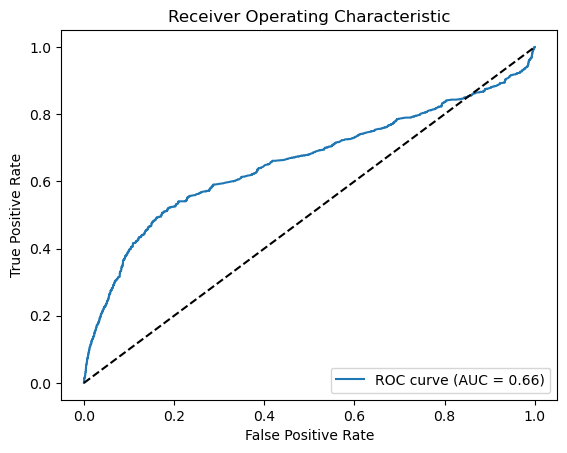

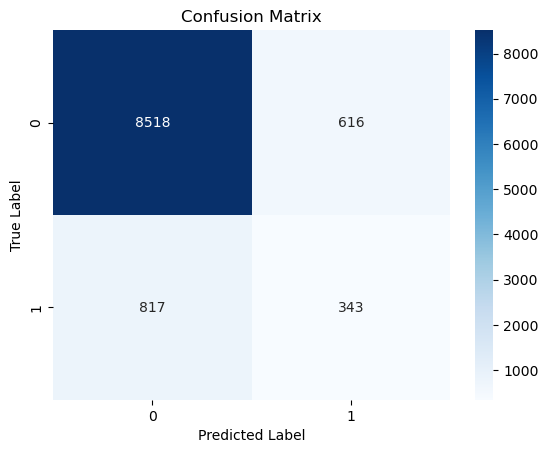

In [69]:
# Generate ROC curve and calculate AUC
y_pred_prob_ab = best_ada_boost.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_pred_prob_ab)
auc_ab = roc_auc_score(y_test, y_pred_prob_ab)

# Plot ROC curve
plt.plot(fpr_ab, tpr_ab, label='ROC curve (AUC = {:.2f})'.format(auc_ab))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_ab = best_ada_boost.predict(X_test)
cm_ab = confusion_matrix(y_test, y_pred_ab)

# Visualize confusion matrix
sns.heatmap(cm_ab, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Gradient Boosting:

In [70]:
# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0],     
    'max_depth': [3, 4, 5]                 
}

# Perform grid search for Gradient Boosting
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)

# Get the best Gradient Boosting model and its performance
best_gradient_boosting = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Train the best Gradient Boosting model with all data
best_gradient_boosting.fit(X_train, y_train)

# Evaluate the best Gradient Boosting model
test_accuracy_gb = best_gradient_boosting.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy_gb*100:.2f}%')

Test Accuracy: 89.60%


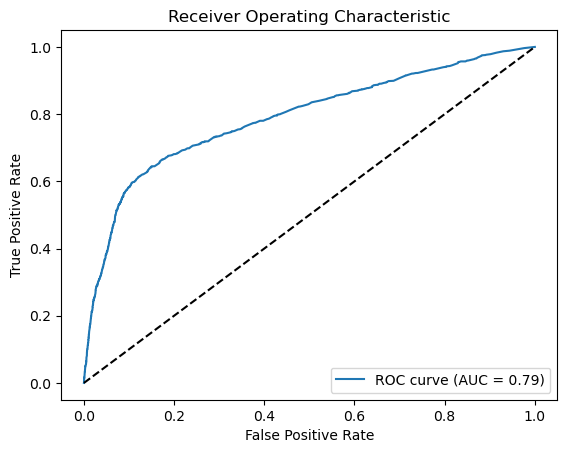

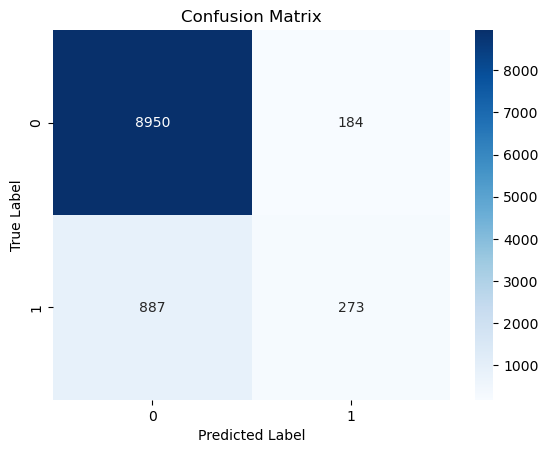

In [71]:
# Generate ROC curve and calculate AUC
y_pred_prob_gb = best_gradient_boosting.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Plot ROC curve
plt.plot(fpr_gb, tpr_gb, label='ROC curve (AUC = {:.2f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_gb = best_gradient_boosting.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Visualize confusion matrix
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Dataset unbalance problem

By showing the ROC curve, the AUC value and the confusion matrix, we can see that, despite having a high accuracy, there is a problem with our models.

The data we have are unbalanced, since we have much more data from the "No" class than from the "Yes" class. This makes that our models do not learn well due to the unbalance. 

To fix it, we have different possible solutions: 

- **Penalize the majority class:** Since we learn more with it, by putting a penalty we could make the other class to be taken more into account. However, not all models allow us to make this modification. The logistic regression and the Random Forest implemented does allow us to do it by means of the parameter "class_weight='balanced'". Even so, these models are not the best performing, so it is not an effective measure for the whole analysis.



- **Try more complex ensemble methods** that work better for these types of unbalanced datasets. One of the possible implementations is to make use of the "StackingClassifier". 



- **Make use of subsampling and oversampling:** That is, if we remove records from the majority class, or synthetically add records from the minority class, we can try to reduce the unbalance and make it more balanced, thus improving the results of our models.



- **Analyze if there are variables that are not relevant in the dataset for most of our models and eliminate them:** By doing this, we can eliminate variables that always take similar values that are causing this unbalance and that do not contribute information to our models.


### OVERSAMPLING APPROACH (and penalizing the majority class if the model allows it)

Let's start by applying oversampling. For this we make use of the "imblearn" library and the SMOTE (Synthetic Minority Over-sampling Technique) function.

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE(k_neighbors = 5, random_state=random_seed)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

In [21]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30882, 14)
X_test shape: (10294, 14)
y_train: (30882,)
y_test shape: (10294,)


In [22]:
print("X_train shape:",X_train_os.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train_os.shape)
print("y_test shape:", y_test.shape)

X_train shape: (54806, 14)
X_test shape: (10294, 14)
y_train: (54806,)
y_test shape: (10294,)


As we can see, more records have been added to the train partitions, from 30882 to 54804 records. It should be noted that it is only applied to the training set and not to the test set to avoid bias in the evaluation of the model.

In this way the model is allowed to more effectively learn the underlying characteristics of the minority classes without compromising the unbiased evaluation of the model on the test set.

### We retrain the most successful models with the new train partition.

#### LOGISTIC REGRESSION (WITH SMOTE):  
#### Linear regression method for binary classification problems

In addition, in this case we use the **penalization to the majority class, as this method allows it**

In [76]:
model_lr_smote = LogisticRegression(class_weight='balanced')
model_lr_smote.fit( X_train_os, y_train_os)

LogisticRegression(class_weight='balanced')

In [77]:
y_pred_lr_os = model_lr_smote.predict(X_test)

In [78]:
accuracy_lr_os = accuracy_score(y_test, y_pred_lr_os)
report_lr_os = classification_report(y_test, y_pred_lr_os)
print("Accuracy:", accuracy_lr_os)
print("Classification Report:\n", report_lr_os)

Accuracy: 0.7832718088206723
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87      9134
           1       0.29      0.63      0.39      1160

    accuracy                           0.78     10294
   macro avg       0.62      0.72      0.63     10294
weighted avg       0.87      0.78      0.81     10294



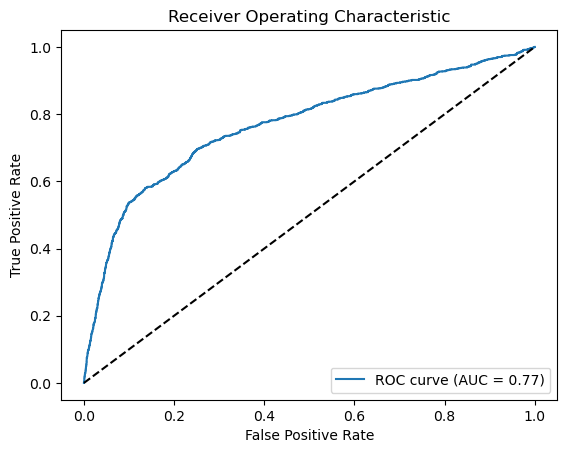

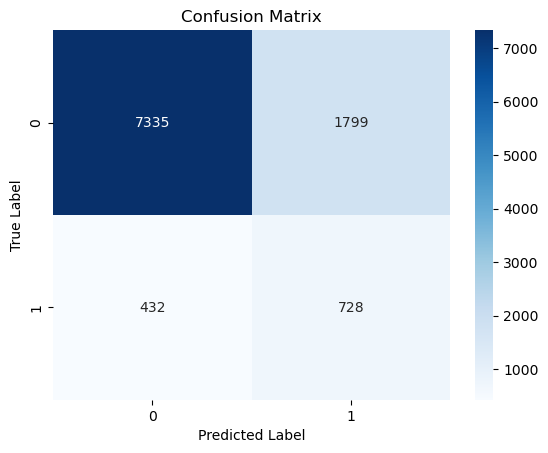

In [79]:
# Generate ROC curve and calculate AUC
y_pred_prob_lr_os = model_lr_smote.predict_proba(X_test)[:, 1]
fpr_lr_os, tpr_lr_os, thresholds_lr_os = roc_curve(y_test, y_pred_prob_lr_os)
auc_lr_os = roc_auc_score(y_test, y_pred_prob_lr_os)

# Plot ROC curve
plt.plot(fpr_lr_os, tpr_lr_os, label='ROC curve (AUC = {:.2f})'.format(auc_lr_os))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_lr_os = model_lr_smote.predict(X_test)
cm_lr_smote = confusion_matrix(y_test, y_pred_lr_os)

# Visualize confusion matrix
sns.heatmap(cm_lr_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
fig_cm_lr_smote = plt.gcf() 
plt.show()

#### COMPARISON OF THE CONFUSION MATRIX WITH THE 2 APPROACHES TO LOGISTIC REGRESSION

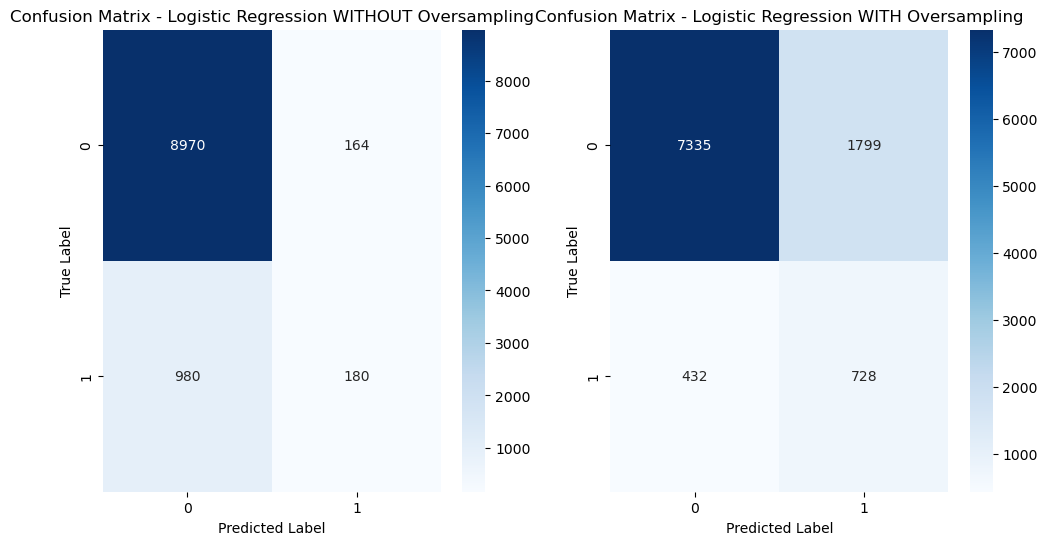

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize confusion matrix - Primera vez
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression WITHOUT Oversampling')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Gráfica 2
sns.heatmap(cm_lr_smote, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression WITH Oversampling')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

As we can see in the figure, by using oversampling and penalization, we obtain a model that classifies the minority class much better. It is true that the majority class is no longer classified as correctly as it was previously. However, we prefer the result to be the latter, since we no longer see the results of the unbalance.

#### KNN (WITH SMOTE):  

In [81]:
param_grid_knn_os= {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

knn_os = KNeighborsClassifier()

# refit true, para que entrenemos con todos los datos
grid_search_knn_os = GridSearchCV(knn_os, param_grid_knn_os, cv=5, refit=True)

grid_search_knn_os.fit(X_train_os, y_train_os)

print("Best hyperparameters:", grid_search_knn_os.best_params_)
print("Accuracy score:", grid_search_knn_os.best_score_)

best_model_knn_os = grid_search_knn_os.best_estimator_
y_pred_knn_os = best_model_knn_os.predict(X_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe18c447eb0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe130783ac0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe18c447eb0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe130783ac0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe130783ac0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe130783ac0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy score: 0.8878230892793496


In [82]:
accuracy_knn_os = accuracy_score(y_test, y_pred_knn_os)
report_knn_os = classification_report(y_test, y_pred_knn_os)
print("Best Parameters:", grid_search_knn_os.best_params_)
print("Accuracy:", accuracy_knn_os)
print("Classification Report:\n", report_knn_os)

Best Parameters: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.8119292791917622
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      9134
           1       0.28      0.41      0.33      1160

    accuracy                           0.81     10294
   macro avg       0.60      0.64      0.61     10294
weighted avg       0.85      0.81      0.83     10294



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe194188280>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


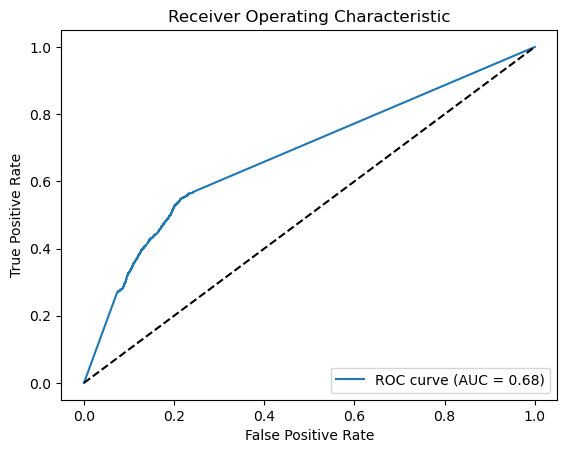

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe194a84310>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


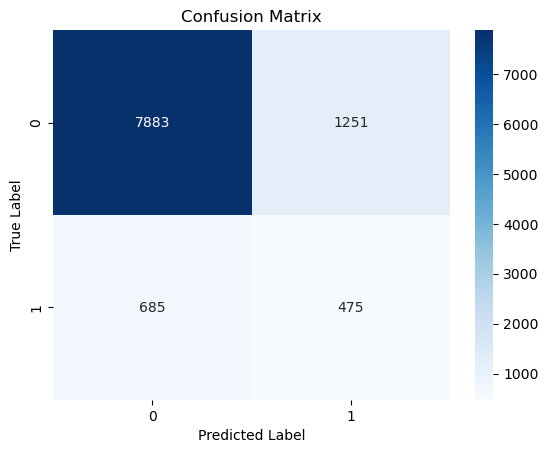

In [83]:
# Generate ROC curve and calculate AUC
y_pred_prob_knn_os = best_model_knn_os.predict_proba(X_test)[:, 1]
fpr_knn_os, tpr_knn_os, thresholds_knn_os = roc_curve(y_test, y_pred_prob_knn_os)
auc_knn_os = roc_auc_score(y_test, y_pred_prob_knn_os)

# Plot ROC curve
plt.plot(fpr_knn_os, tpr_knn_os, label='ROC curve (AUC = {:.2f})'.format(auc_knn_os))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_knn_os = best_model_knn_os.predict(X_test)
cm_knn_os = confusion_matrix(y_test, y_pred_knn_os)

# Visualize confusion matrix
sns.heatmap(cm_knn_os, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### COMPARISON OF THE CONFUSION MATRIX WITH THE 2 APPROACHES TO KNN:

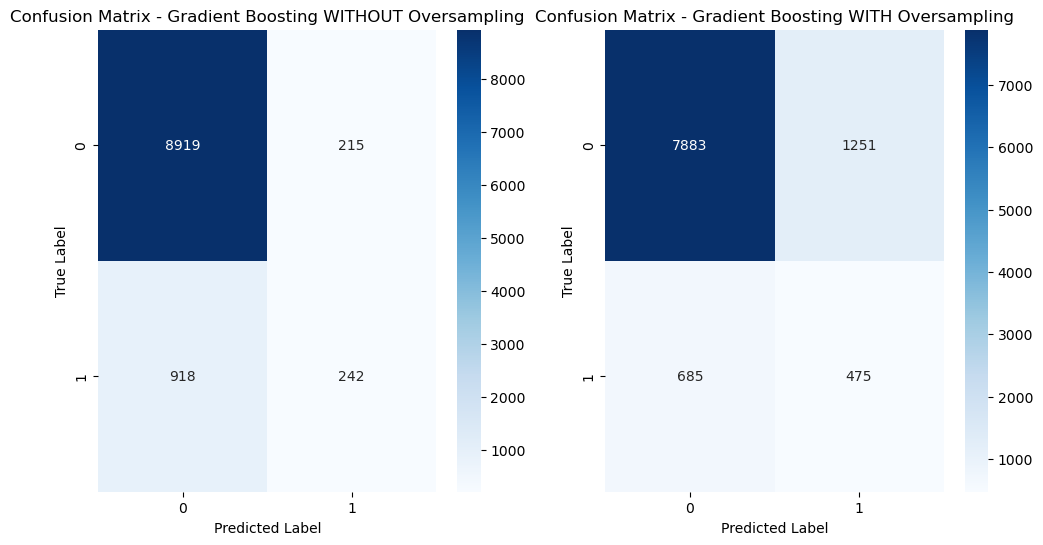

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize confusion matrix - Primera vez
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Gradient Boosting WITHOUT Oversampling')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Gráfica 2
sns.heatmap(cm_knn_os, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Gradient Boosting WITH Oversampling')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

#### CLASSIFICATION TREES (WITH SMOTE)

In [86]:
param_grid_ct_os = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

model_ct_os = DecisionTreeClassifier(random_state=random_seed)
grid_search_ct_os = GridSearchCV(model_ct, param_grid_ct_os, cv=5)
grid_search_ct_os.fit(X_train_os, y_train_os)

best_model_ct_os = grid_search_ct_os.best_estimator_
y_pred_ct_os = best_model_ct_os.predict(X_test)

accuracy_ct_os = accuracy_score(y_test, y_pred_ct_os)
report_ct_os = classification_report(y_test, y_pred_ct_os)
print("Best Parameters:", grid_search_ct_os.best_params_)
print("Accuracy:", accuracy_ct_os)
print("Classification Report:\n", report_ct_os)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.8574897998834272
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      9134
           1       0.35      0.31      0.33      1160

    accuracy                           0.86     10294
   macro avg       0.63      0.62      0.62     10294
weighted avg       0.85      0.86      0.85     10294



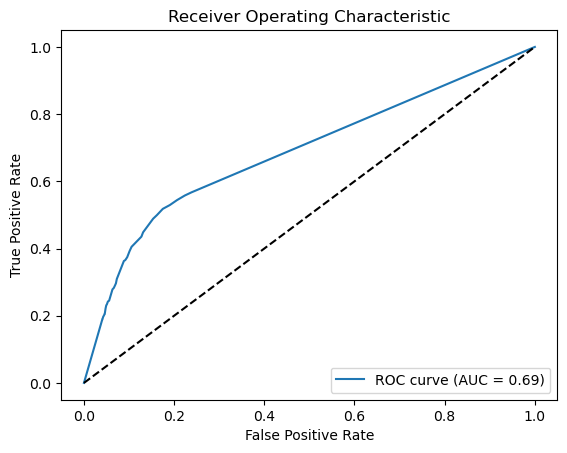

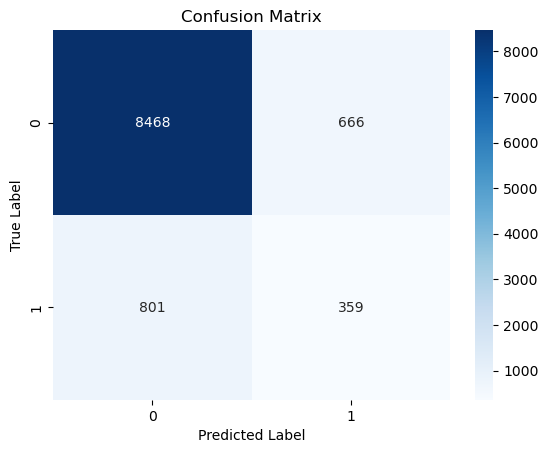

In [87]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_model_ct_os.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_model_ct_os.predict(X_test)
cm_ct_os = confusion_matrix(y_test, y_pred_ct_os)

# Visualize confusion matrix
sns.heatmap(cm_ct_os, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### COMPARISON OF THE CONFUSION MATRIX WITH THE 2 APPROACHES TO CT:

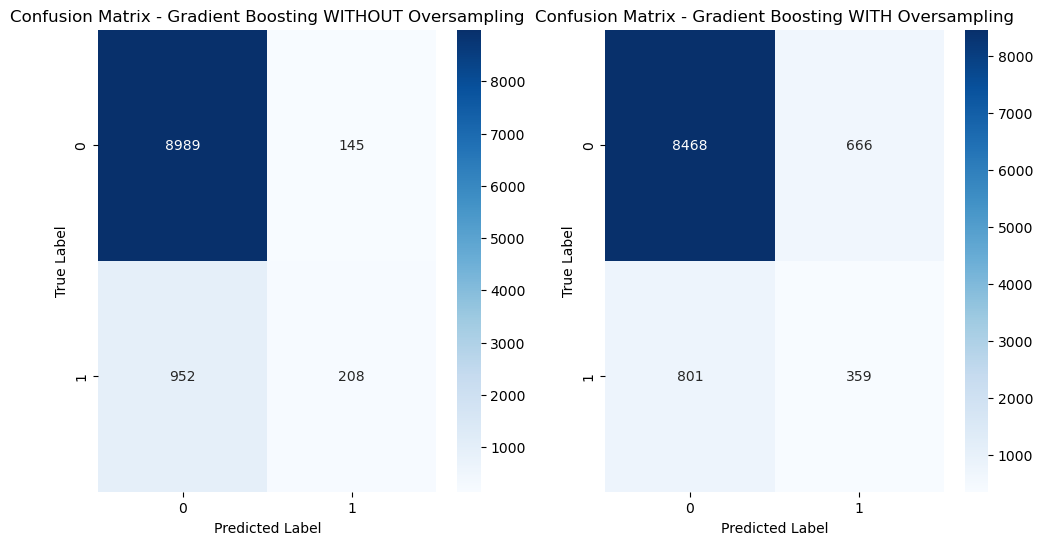

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize confusion matrix - Primera vez
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1
sns.heatmap(cm_ct, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Gradient Boosting WITHOUT Oversampling')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Gráfica 2
sns.heatmap(cm_ct_os, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Gradient Boosting WITH Oversampling')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

#### RANDOM FOREST (WITH SMOTE):  

In [89]:
param_grid_rf_os = {"n_estimators": [50, 100, 200],
              "max_depth": [None, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}
rfc_os = RandomForestClassifier(random_state=random_seed, class_weight='balanced')
grid_search_rf_os = GridSearchCV(rfc_os, param_grid_rf_os, cv=5)
grid_search_rf_os.fit(X_train_os, y_train_os)

print("Best hyperparameters:", grid_search_rf_os.best_params_)
print("Accuracy score:", grid_search_rf_os.best_score_)

best_model_rf_os = grid_search_rf_os.best_estimator_
y_pred_rf_os = best_model_rf_os.predict(X_test)

accuracy_rf_os = accuracy_score(y_test, y_pred_rf_os)
report_rf_os = classification_report(y_test, y_pred_rf_os)
print("Best Parameters:", grid_search_rf_os.best_params_)
print("Accuracy:", accuracy_rf_os)
print("Classification Report:\n", report_rf_os)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy score: 0.9295355291032756
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8835243831358073
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      9134
           1       0.48      0.39      0.43      1160

    accuracy                           0.88     10294
   macro avg       0.70      0.67      0.68     10294
weighted avg       0.87      0.88      0.88     10294



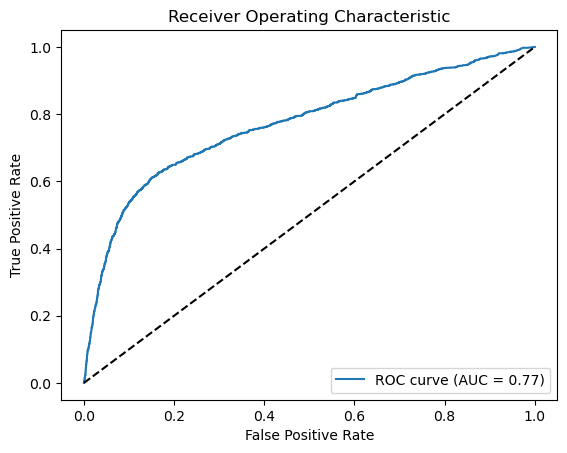

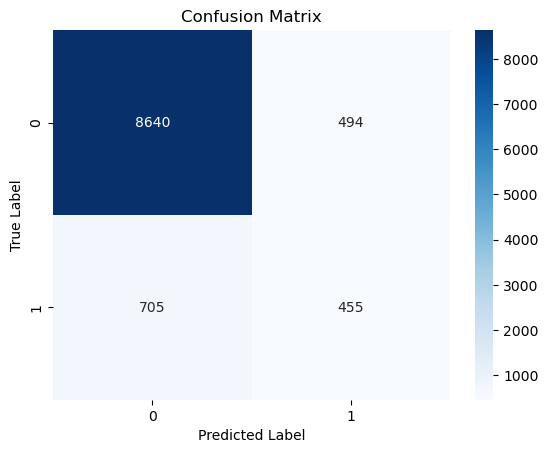

In [90]:
# Generate ROC curve and calculate AUC
y_pred_prob_rf_os = best_model_rf_os.predict_proba(X_test)[:, 1]
fpr_rf_os, tpr_rf_os, thresholds_rf_os = roc_curve(y_test, y_pred_prob_rf_os)
auc_rf_os = roc_auc_score(y_test, y_pred_prob_rf_os)

# Plot ROC curve
plt.plot(fpr_rf_os, tpr_rf_os, label='ROC curve (AUC = {:.2f})'.format(auc_rf_os))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_rf_os = best_model_rf_os.predict(X_test)
cm_rf_os = confusion_matrix(y_test, y_pred_rf_os)

# Visualize confusion matrix
sns.heatmap(cm_rf_os, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### COMPARISON OF THE CONFUSION MATRIX WITH THE 2 APPROACHES TO RANDOM FOREST:

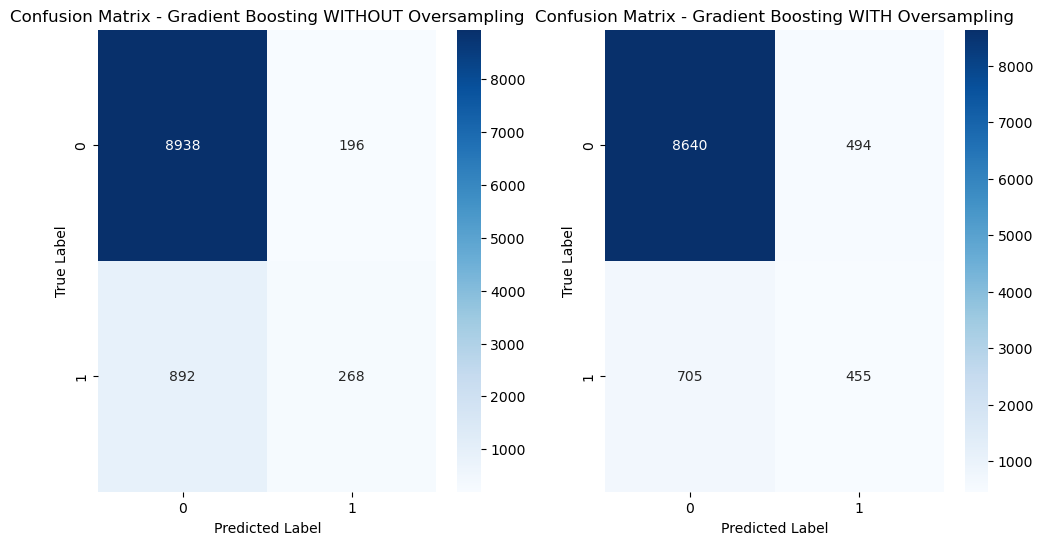

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize confusion matrix - Primera vez
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Gradient Boosting WITHOUT Oversampling')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Gráfica 2
sns.heatmap(cm_rf_os, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Gradient Boosting WITH Oversampling')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

#### GRADIENT BOOSTING (WITH SMOTE):  

In [102]:
# Create the Gradient Boosting classifier
gradient_boosting_smote = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid_gb_os = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0],     
    'max_depth': [3, 4, 5]                 
}

# Perform grid search for Gradient Boosting
grid_search_gb_os = GridSearchCV(gradient_boosting_smote, param_grid_gb_os, cv=3)
grid_search_gb_os.fit(X_train_os, y_train_os)

# Get the best Gradient Boosting model and its performance
best_gradient_boosting_smote = grid_search_gb_os.best_estimator_
best_params_gb_os = grid_search_gb_os.best_params_
best_score_gb_os = grid_search_gb_os.best_score_

# Train the best Gradient Boosting model with all data
best_gradient_boosting_smote.fit(X_train_os, y_train_os)

# Evaluate the best Gradient Boosting model
test_accuracy_gb_os = best_gradient_boosting_smote.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy_gb_os*100:.2f}%')

Test Accuracy: 88.95%


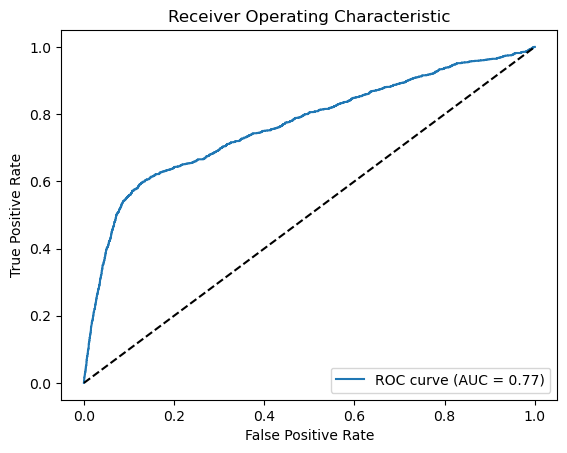

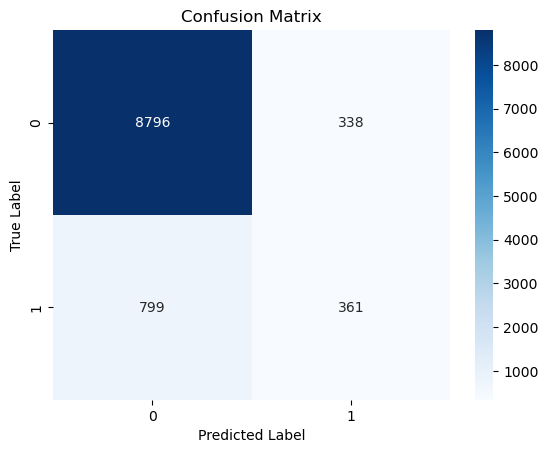

In [103]:
# Generate ROC curve and calculate AUC
y_pred_prob_gb_os = best_gradient_boosting_smote.predict_proba(X_test)[:, 1]
fpr_gb_os, tpr_gb_os, thresholds_gb_os = roc_curve(y_test, y_pred_prob_gb_os)
auc_gb_os = roc_auc_score(y_test, y_pred_prob_gb_os)

# Plot ROC curve
plt.plot(fpr_gb_os, tpr_gb_os, label='ROC curve (AUC = {:.2f})'.format(auc_gb_os))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_gb_os = best_gradient_boosting_smote.predict(X_test)
cm_gb_smote = confusion_matrix(y_test, y_pred_gb_os)

# Visualize confusion matrix
sns.heatmap(cm_gb_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### COMPARISON OF THE CONFUSION MATRIX WITH THE 2 APPROACHES TO GRADIENT BOOSTING:

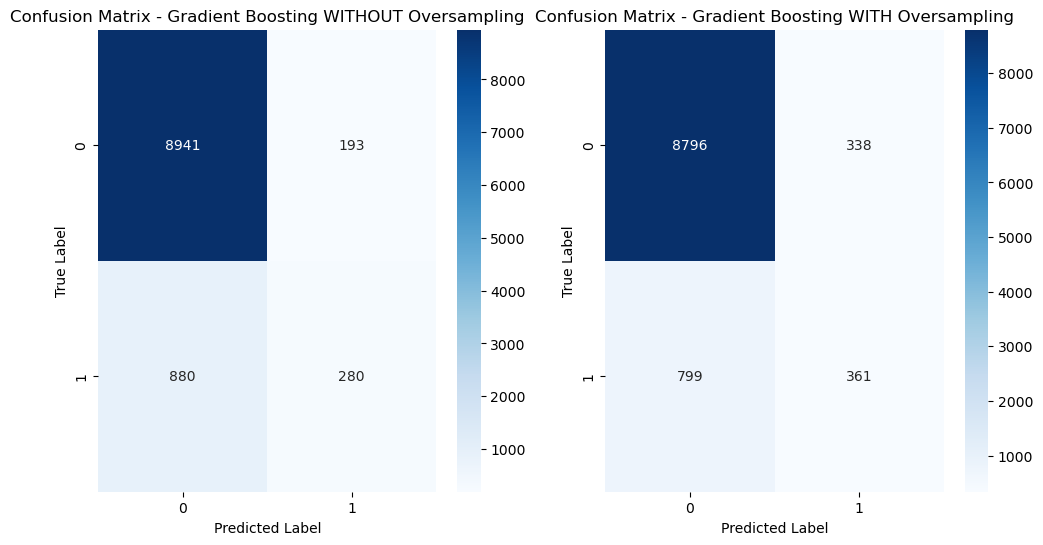

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize confusion matrix - Primera vez
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Gradient Boosting WITHOUT Oversampling')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Gráfica 2
sns.heatmap(cm_gb_smote, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Gradient Boosting WITH Oversampling')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

As we can see in both confusion matrices, the inclusion of oversampling improves the predictions. However, the improvement obtained with Logistic regression is better than with Gradient Boosting. Therefore, although without oversampling we would choose Gradient Boosting as the best model, using oversampling we choose logistic regression as the best model between these two.

#### NEURAL NETWORK (WITH SMOTE):  

In [24]:
def create_model_nn(hidden_units=128):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train_os.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the parameter gridB
param_grid_nn_os = {
    'hidden_units': [64, 128, 256],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the model
model_nn_os = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)

# Perform grid search
grid_search_nn_os = GridSearchCV(model_nn_os, param_grid_nn_os, cv=3)
grid_search_nn_os.fit(X_train_os, y_train_os)

# Get the best parameters
best_params_nn_os = grid_search_nn_os.best_params_
best_params_nn_os

Epoch 1/10
2284/2284 [==============================] - 2s 743us/step - loss: 0.5075 - accuracy: 0.7220
Epoch 2/10
2284/2284 [==============================] - 2s 727us/step - loss: 0.4939 - accuracy: 0.7378
Epoch 3/10
2284/2284 [==============================] - 2s 727us/step - loss: 0.4858 - accuracy: 0.7508
Epoch 4/10
2284/2284 [==============================] - 2s 722us/step - loss: 0.4768 - accuracy: 0.7601
Epoch 5/10
2284/2284 [==============================] - 2s 727us/step - loss: 0.4682 - accuracy: 0.7686
Epoch 6/10
2284/2284 [==============================] - 2s 735us/step - loss: 0.4598 - accuracy: 0.7759
Epoch 7/10
2284/2284 [==============================] - 2s 721us/step - loss: 0.4514 - accuracy: 0.7829
Epoch 8/10
2284/2284 [==============================] - 2s 728us/step - loss: 0.4440 - accuracy: 0.7876
Epoch 9/10
2284/2284 [==============================] - 2s 729us/step - loss: 0.4363 - accuracy: 0.7935
Epoch 10/10
1142/1142 [==============================] - 1s 507u

2284/2284 [==============================] - 2s 856us/step - loss: 0.5348 - accuracy: 0.7287
Epoch 4/10
2284/2284 [==============================] - 2s 856us/step - loss: 0.5238 - accuracy: 0.7369
Epoch 5/10
2284/2284 [==============================] - 2s 860us/step - loss: 0.5152 - accuracy: 0.7413
Epoch 6/10
2284/2284 [==============================] - 2s 833us/step - loss: 0.5054 - accuracy: 0.7478
Epoch 7/10
2284/2284 [==============================] - 2s 840us/step - loss: 0.4964 - accuracy: 0.7520
Epoch 8/10
2284/2284 [==============================] - 2s 833us/step - loss: 0.4880 - accuracy: 0.7572
Epoch 9/10
2284/2284 [==============================] - 2s 831us/step - loss: 0.4798 - accuracy: 0.7642
Epoch 10/10
1142/1142 [==============================] - 1s 551us/step - loss: 0.5097 - accuracy: 0.7536
Epoch 1/10
2284/2284 [==============================] - 2s 816us/step - loss: 0.4554 - accuracy: 0.8093
Epoch 2/10
2284/2284 [==============================] - 2s 846us/step - lo

Epoch 18/20
2284/2284 [==============================] - 2s 794us/step - loss: 0.3943 - accuracy: 0.8338
Epoch 19/20
2284/2284 [==============================] - 2s 811us/step - loss: 0.3914 - accuracy: 0.8361
Epoch 20/20
1142/1142 [==============================] - 1s 565us/step - loss: 0.8895 - accuracy: 0.5406
Epoch 1/20
2284/2284 [==============================] - 2s 801us/step - loss: 0.5041 - accuracy: 0.7273
Epoch 2/20
2284/2284 [==============================] - 2s 836us/step - loss: 0.4928 - accuracy: 0.7373
Epoch 3/20
2284/2284 [==============================] - 2s 850us/step - loss: 0.4853 - accuracy: 0.7497
Epoch 4/20
2284/2284 [==============================] - 2s 836us/step - loss: 0.4750 - accuracy: 0.7598
Epoch 5/20
2284/2284 [==============================] - 2s 829us/step - loss: 0.4677 - accuracy: 0.7687
Epoch 6/20
2284/2284 [==============================] - 2s 831us/step - loss: 0.4601 - accuracy: 0.7738
Epoch 7/20
2284/2284 [==============================] - 2s 82

2284/2284 [==============================] - 2s 856us/step - loss: 0.4027 - accuracy: 0.8160
Epoch 13/20
2284/2284 [==============================] - 2s 857us/step - loss: 0.3954 - accuracy: 0.8203
Epoch 14/20
2284/2284 [==============================] - 2s 860us/step - loss: 0.3864 - accuracy: 0.8275
Epoch 15/20
2284/2284 [==============================] - 2s 880us/step - loss: 0.3784 - accuracy: 0.8303
Epoch 16/20
2284/2284 [==============================] - 2s 874us/step - loss: 0.3693 - accuracy: 0.8367
Epoch 17/20
2284/2284 [==============================] - 2s 849us/step - loss: 0.3631 - accuracy: 0.8407
Epoch 18/20
2284/2284 [==============================] - 2s 862us/step - loss: 0.3543 - accuracy: 0.8465
Epoch 19/20
2284/2284 [==============================] - 2s 852us/step - loss: 0.3473 - accuracy: 0.8500
Epoch 20/20
1142/1142 [==============================] - 1s 557us/step - loss: 0.7214 - accuracy: 0.6225
Epoch 1/20
2284/2284 [==============================] - 2s 805us/st

2284/2284 [==============================] - 2s 782us/step - loss: 0.3456 - accuracy: 0.8507
Epoch 28/30
2284/2284 [==============================] - 2s 780us/step - loss: 0.3441 - accuracy: 0.8531
Epoch 29/30
2284/2284 [==============================] - 2s 782us/step - loss: 0.3400 - accuracy: 0.8557
Epoch 30/30
1142/1142 [==============================] - 1s 571us/step - loss: 0.6628 - accuracy: 0.6815
Epoch 1/30
2284/2284 [==============================] - 2s 787us/step - loss: 0.5555 - accuracy: 0.7182
Epoch 2/30
2284/2284 [==============================] - 2s 820us/step - loss: 0.5437 - accuracy: 0.7249
Epoch 3/30
2284/2284 [==============================] - 2s 825us/step - loss: 0.5379 - accuracy: 0.7273
Epoch 4/30
2284/2284 [==============================] - 2s 896us/step - loss: 0.5313 - accuracy: 0.7312
Epoch 5/30
2284/2284 [==============================] - 2s 858us/step - loss: 0.5240 - accuracy: 0.7327
Epoch 6/30
2284/2284 [==============================] - 2s 800us/step - 

2284/2284 [==============================] - 2s 798us/step - loss: 0.4029 - accuracy: 0.8166
Epoch 13/30
2284/2284 [==============================] - 2s 793us/step - loss: 0.3960 - accuracy: 0.8206
Epoch 14/30
2284/2284 [==============================] - 2s 782us/step - loss: 0.3889 - accuracy: 0.8256
Epoch 15/30
2284/2284 [==============================] - 2s 790us/step - loss: 0.3828 - accuracy: 0.8299
Epoch 16/30
2284/2284 [==============================] - 2s 794us/step - loss: 0.3761 - accuracy: 0.8332
Epoch 17/30
2284/2284 [==============================] - 2s 799us/step - loss: 0.3691 - accuracy: 0.8375
Epoch 18/30
2284/2284 [==============================] - 2s 866us/step - loss: 0.3639 - accuracy: 0.8413
Epoch 19/30
2284/2284 [==============================] - 2s 864us/step - loss: 0.3558 - accuracy: 0.8462
Epoch 20/30
2284/2284 [==============================] - 2s 850us/step - loss: 0.3516 - accuracy: 0.8485
Epoch 21/30
2284/2284 [==============================] - 2s 848us/s

2284/2284 [==============================] - 2s 790us/step - loss: 0.3580 - accuracy: 0.8468
Epoch 29/30
2284/2284 [==============================] - 2s 801us/step - loss: 0.3547 - accuracy: 0.8472
Epoch 30/30
1142/1142 [==============================] - 1s 548us/step - loss: 0.8720 - accuracy: 0.5746
Epoch 1/30
2284/2284 [==============================] - 2s 766us/step - loss: 0.5053 - accuracy: 0.7252
Epoch 2/30
2284/2284 [==============================] - 2s 788us/step - loss: 0.4944 - accuracy: 0.7331
Epoch 3/30
2284/2284 [==============================] - 2s 789us/step - loss: 0.4875 - accuracy: 0.7448
Epoch 4/30
2284/2284 [==============================] - 2s 777us/step - loss: 0.4783 - accuracy: 0.7577
Epoch 5/30
2284/2284 [==============================] - 2s 820us/step - loss: 0.4675 - accuracy: 0.7654
Epoch 6/30
2284/2284 [==============================] - 2s 807us/step - loss: 0.4573 - accuracy: 0.7761
Epoch 7/30
2284/2284 [==============================] - 2s 790us/step - l

2284/2284 [==============================] - 2s 771us/step - loss: 0.4037 - accuracy: 0.8306
Epoch 14/30
2284/2284 [==============================] - 2s 792us/step - loss: 0.4007 - accuracy: 0.8333
Epoch 15/30
2284/2284 [==============================] - 2s 830us/step - loss: 0.3970 - accuracy: 0.8342
Epoch 16/30
2284/2284 [==============================] - 2s 819us/step - loss: 0.3929 - accuracy: 0.8370
Epoch 17/30
2284/2284 [==============================] - 2s 781us/step - loss: 0.3887 - accuracy: 0.8372
Epoch 18/30
2284/2284 [==============================] - 2s 767us/step - loss: 0.3846 - accuracy: 0.8377
Epoch 19/30
2284/2284 [==============================] - 2s 861us/step - loss: 0.3804 - accuracy: 0.8388
Epoch 20/30
2284/2284 [==============================] - 2s 809us/step - loss: 0.3763 - accuracy: 0.8415
Epoch 21/30
2284/2284 [==============================] - 2s 843us/step - loss: 0.3731 - accuracy: 0.8427
Epoch 22/30
2284/2284 [==============================] - 2s 827us/s

1142/1142 [==============================] - 1s 861us/step - loss: 0.4307 - accuracy: 0.8199
Epoch 7/10
1142/1142 [==============================] - 1s 838us/step - loss: 0.4273 - accuracy: 0.8206
Epoch 8/10
1142/1142 [==============================] - 1s 793us/step - loss: 0.4235 - accuracy: 0.8226
Epoch 9/10
1142/1142 [==============================] - 1s 791us/step - loss: 0.4193 - accuracy: 0.8253
Epoch 10/10
571/571 [==============================] - 0s 547us/step - loss: 0.9571 - accuracy: 0.5386
Epoch 1/10
1142/1142 [==============================] - 1s 789us/step - loss: 0.5036 - accuracy: 0.7256
Epoch 2/10
1142/1142 [==============================] - 1s 818us/step - loss: 0.4939 - accuracy: 0.7370
Epoch 3/10
1142/1142 [==============================] - 1s 795us/step - loss: 0.4874 - accuracy: 0.7449
Epoch 4/10
1142/1142 [==============================] - 1s 808us/step - loss: 0.4788 - accuracy: 0.7568
Epoch 5/10
1142/1142 [==============================] - 1s 841us/step - loss

571/571 [==============================] - 0s 573us/step - loss: 0.4987 - accuracy: 0.7702
Epoch 1/20
1142/1142 [==============================] - 1s 745us/step - loss: 0.4591 - accuracy: 0.8051
Epoch 2/20
1142/1142 [==============================] - 1s 761us/step - loss: 0.4460 - accuracy: 0.8152
Epoch 3/20
1142/1142 [==============================] - 1s 786us/step - loss: 0.4432 - accuracy: 0.8167
Epoch 4/20
1142/1142 [==============================] - 1s 808us/step - loss: 0.4406 - accuracy: 0.8171
Epoch 5/20
1142/1142 [==============================] - 1s 802us/step - loss: 0.4377 - accuracy: 0.8172
Epoch 6/20
1142/1142 [==============================] - 1s 809us/step - loss: 0.4352 - accuracy: 0.8179
Epoch 7/20
1142/1142 [==============================] - 1s 806us/step - loss: 0.4321 - accuracy: 0.8190
Epoch 8/20
1142/1142 [==============================] - 1s 814us/step - loss: 0.4290 - accuracy: 0.8198
Epoch 9/20
1142/1142 [==============================] - 1s 807us/step - loss:

1142/1142 [==============================] - 1s 766us/step - loss: 0.4002 - accuracy: 0.8337
Epoch 16/20
1142/1142 [==============================] - 1s 766us/step - loss: 0.3978 - accuracy: 0.8334
Epoch 17/20
1142/1142 [==============================] - 1s 758us/step - loss: 0.3954 - accuracy: 0.8348
Epoch 18/20
1142/1142 [==============================] - 1s 771us/step - loss: 0.3915 - accuracy: 0.8356
Epoch 19/20
1142/1142 [==============================] - 1s 778us/step - loss: 0.3876 - accuracy: 0.8361
Epoch 20/20
571/571 [==============================] - 0s 553us/step - loss: 0.9437 - accuracy: 0.5535
Epoch 1/20
1142/1142 [==============================] - 1s 766us/step - loss: 0.5039 - accuracy: 0.7264
Epoch 2/20
1142/1142 [==============================] - 1s 792us/step - loss: 0.4931 - accuracy: 0.7379
Epoch 3/20
1142/1142 [==============================] - 1s 815us/step - loss: 0.4863 - accuracy: 0.7452
Epoch 4/20
1142/1142 [==============================] - 1s 801us/step - 

1142/1142 [==============================] - 1s 838us/step - loss: 0.4415 - accuracy: 0.7860
Epoch 11/30
1142/1142 [==============================] - 1s 867us/step - loss: 0.4353 - accuracy: 0.7911
Epoch 12/30
1142/1142 [==============================] - 1s 860us/step - loss: 0.4311 - accuracy: 0.7923
Epoch 13/30
1142/1142 [==============================] - 1s 924us/step - loss: 0.4248 - accuracy: 0.7995
Epoch 14/30
1142/1142 [==============================] - 1s 878us/step - loss: 0.4203 - accuracy: 0.8019
Epoch 15/30
1142/1142 [==============================] - 1s 800us/step - loss: 0.4161 - accuracy: 0.8062
Epoch 16/30
1142/1142 [==============================] - 1s 753us/step - loss: 0.4115 - accuracy: 0.8094
Epoch 17/30
1142/1142 [==============================] - 1s 740us/step - loss: 0.4070 - accuracy: 0.8122
Epoch 18/30
1142/1142 [==============================] - 1s 783us/step - loss: 0.4020 - accuracy: 0.8160
Epoch 19/30
1142/1142 [==============================] - 1s 750us/s

1142/1142 [==============================] - 1s 779us/step - loss: 0.3781 - accuracy: 0.8400
Epoch 27/30
1142/1142 [==============================] - 1s 774us/step - loss: 0.3745 - accuracy: 0.8418
Epoch 28/30
1142/1142 [==============================] - 1s 770us/step - loss: 0.3728 - accuracy: 0.8429
Epoch 29/30
1142/1142 [==============================] - 1s 781us/step - loss: 0.3704 - accuracy: 0.8428
Epoch 30/30
571/571 [==============================] - 0s 537us/step - loss: 0.7721 - accuracy: 0.5870
Epoch 1/30
1142/1142 [==============================] - 1s 842us/step - loss: 0.5073 - accuracy: 0.7246
Epoch 2/30
1142/1142 [==============================] - 1s 934us/step - loss: 0.4923 - accuracy: 0.7396
Epoch 3/30
1142/1142 [==============================] - 1s 863us/step - loss: 0.4848 - accuracy: 0.7488
Epoch 4/30
1142/1142 [==============================] - 1s 817us/step - loss: 0.4762 - accuracy: 0.7600
Epoch 5/30
1142/1142 [==============================] - 1s 798us/step - l

1142/1142 [==============================] - 1s 910us/step - loss: 0.4146 - accuracy: 0.8272
Epoch 12/30
1142/1142 [==============================] - 1s 837us/step - loss: 0.4122 - accuracy: 0.8292
Epoch 13/30
1142/1142 [==============================] - 1s 801us/step - loss: 0.4086 - accuracy: 0.8298
Epoch 14/30
1142/1142 [==============================] - 1s 821us/step - loss: 0.4048 - accuracy: 0.8300
Epoch 15/30
1142/1142 [==============================] - 1s 825us/step - loss: 0.4015 - accuracy: 0.8310
Epoch 16/30
1142/1142 [==============================] - 1s 827us/step - loss: 0.3990 - accuracy: 0.8328
Epoch 17/30
1142/1142 [==============================] - 1s 804us/step - loss: 0.3954 - accuracy: 0.8334
Epoch 18/30
1142/1142 [==============================] - 1s 787us/step - loss: 0.3913 - accuracy: 0.8341
Epoch 19/30
1142/1142 [==============================] - 1s 784us/step - loss: 0.3884 - accuracy: 0.8360
Epoch 20/30
1142/1142 [==============================] - 1s 776us/s

KeyboardInterrupt: 

In [112]:
best_model_nn_os = create_model_nn(best_params_nn_os['hidden_units'])
best_model_nn_os.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_nn_os.fit(X_train, y_train, epochs=best_params_nn_os['epochs'], batch_size=best_params_nn_os['batch_size'])

Epoch 1/30
1931/1931 [==============================] - 2s 787us/step - loss: 0.2960 - accuracy: 0.8883
Epoch 2/30
1931/1931 [==============================] - 2s 839us/step - loss: 0.2881 - accuracy: 0.8931
Epoch 3/30
1931/1931 [==============================] - 2s 850us/step - loss: 0.2867 - accuracy: 0.8923
Epoch 4/30
1931/1931 [==============================] - 2s 813us/step - loss: 0.2859 - accuracy: 0.8933
Epoch 5/30
1931/1931 [==============================] - 2s 778us/step - loss: 0.2851 - accuracy: 0.8942
Epoch 6/30
1931/1931 [==============================] - 1s 775us/step - loss: 0.2844 - accuracy: 0.8942
Epoch 7/30
1931/1931 [==============================] - 2s 778us/step - loss: 0.2833 - accuracy: 0.8944
Epoch 8/30
1931/1931 [==============================] - 1s 776us/step - loss: 0.2833 - accuracy: 0.8951
Epoch 9/30
1931/1931 [==============================] - 1s 772us/step - loss: 0.2823 - accuracy: 0.8952
Epoch 10/30
1931/1931 [==============================] - 1s 776u

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob_nn_os = best_model_nn_os.predict(X_test)
y_pred_nn_os = (y_pred_prob_nn_os > 0.5).astype(int)

accuracy_nn_os = accuracy_score(y_test, y_pred_nn_os)
precision_nn_os = precision_score(y_test, y_pred_nn_os)
recall_nn_os = recall_score(y_test, y_pred_nn_os)
f1_nn_os = f1_score(y_test, y_pred_nn_os)

print('Accuracy: %.2f' % (accuracy_nn_os*100))
print('Precision: %.2f' % (precision_nn_os*100))
print('Recall: %.2f' % (recall_nn_os*100))
print('F1-score: %.2f' % (f1_nn_os*100))

322/322 [==============================] - 0s 479us/step
Accuracy: 89.11
Precision: 54.23
Recall: 21.55
F1-score: 30.85


In [115]:
print("Best Parameters: ", best_params_nn_os)

# Evaluate the model
print(f'Test Accuracy: {accuracy_nn_os*100:.2f}%')

Best Parameters:  {'batch_size': 16, 'epochs': 30, 'hidden_units': 64}
Test Accuracy: 89.11%


322/322 [==============================] - 0s 474us/step


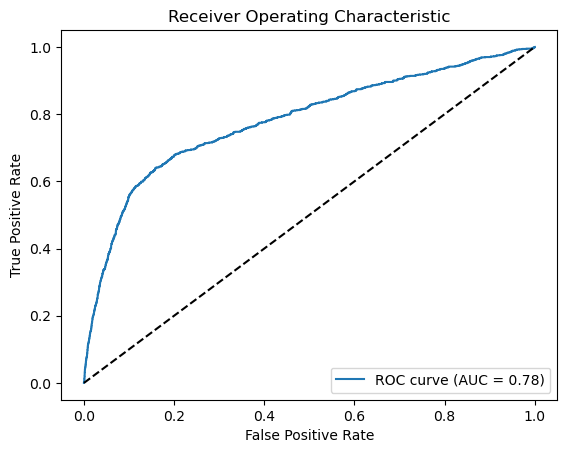

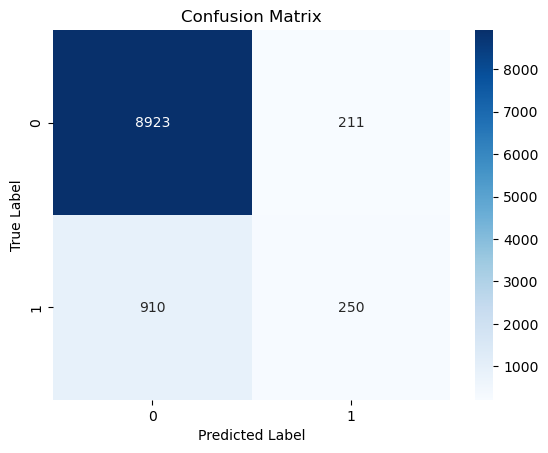

In [120]:
y_pred_prob_nn_os = best_model_nn_os.predict(X_test)

fpr_nn_os, tpr_nn_os, thresholds_nn_os = roc_curve(y_test, y_pred_prob_nn_os)
auc_nn_os = roc_auc_score(y_test, y_pred_prob_nn_os)

plt.plot(fpr_nn_os, tpr_nn_os, label='ROC curve (AUC = {:.2f})'.format(auc_nn_os))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


umbral = 0.5
y_pred_discret_nn_os = np.where(y_pred_prob_nn_os >= umbral, 1, 0)

cm_nn_os = confusion_matrix(y_test, y_pred_discret_nn_os)

sns.heatmap(cm_nn_os, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### COMPARISON OF THE CONFUSION MATRIX WITH THE 2 APPROACHES TO GRADIENT NEURAL NETWORK:

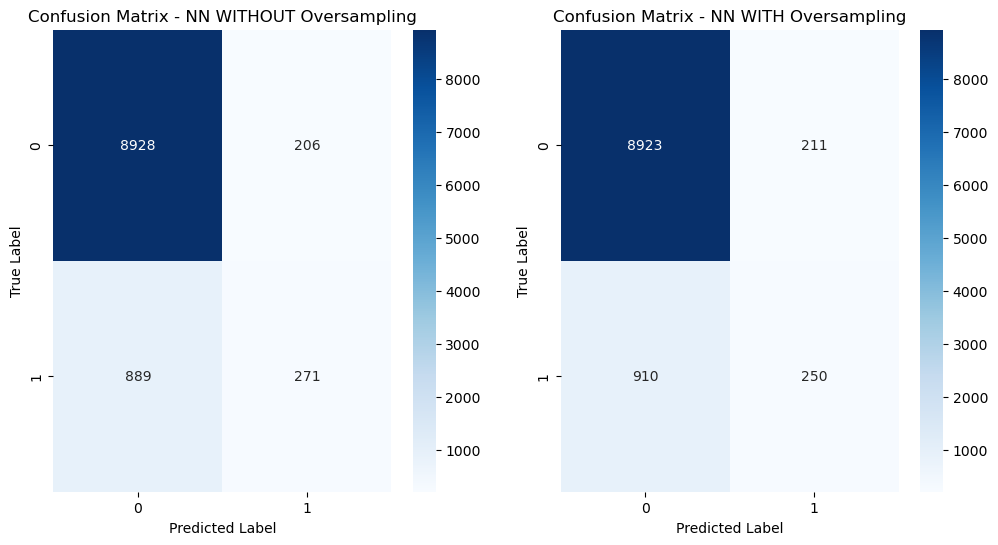

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize confusion matrix - Primera vez
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graph 1
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - NN WITHOUT Oversampling')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Graph 2
sns.heatmap(cm_nn_os, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - NN WITH Oversampling')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

### Stacked Generalization Ensemble

In order to solve the problem of the unbalanced dataset, we can also use different algorithms, as I stated before. One of the ones that behaves better is the Stacked Generalization Ensemble. For this algorithm, we will evaluate it with and without oversampling to analyse the impact of both solutions independently:

In [23]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Define base classifiers
rf_classifier = RandomForestClassifier(random_state=random_seed)
lr_classifier = LogisticRegression(random_state=random_seed)
knn_classifier = KNeighborsClassifier()

# Define the StackingClassifier
estimators = [
    ('rf', rf_classifier),
    ('lr', lr_classifier),
    ('knn', knn_classifier)
]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Define params grid
param_grid_sc = {
    'rf__n_estimators': [100, 200, 300],
    'knn__n_neighbors': [3, 5, 7],
    'final_estimator__C': [0.1, 1, 10]
}

# Hiperparms search using GridSearchCV
grid_search_sc = GridSearchCV(stacking_classifier, param_grid_sc, cv=5)
grid_search_sc.fit(X_train, y_train)

# Get the best params
best_params_sc = grid_search_sc.best_params_
print("Mejores parámetros:", best_params_sc)

# Use the best model to predict
best_model_sc = grid_search_sc.best_estimator_
y_pred_sc = best_model_sc.predict(X_test)

# Get the accuracy
accuracy_sc = accuracy_score(y_test, y_pred_sc)
print("Precisión:", accuracy_sc)


Mejores parámetros: {'final_estimator__C': 1, 'knn__n_neighbors': 3, 'rf__n_estimators': 300}
Precisión: 0.8932387798717699


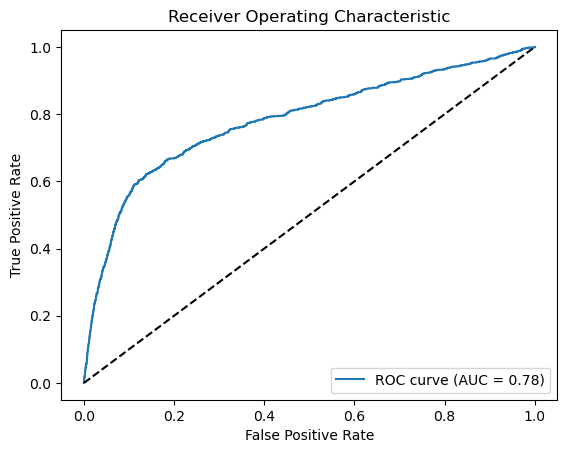

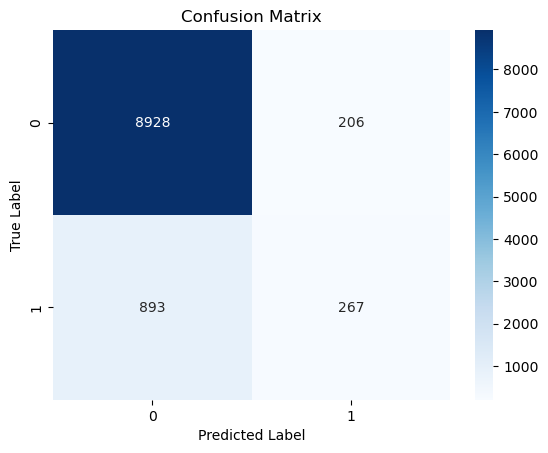

In [24]:
# Generate ROC curve and calculate AUC
y_pred_prob_sc = best_model_sc.predict_proba(X_test)[:, 1]
fpr_sc, tpr_sc, thresholds_sc = roc_curve(y_test, y_pred_prob_sc)
auc_sc = roc_auc_score(y_test, y_pred_prob_sc)

# Plot ROC curve
plt.plot(fpr_sc, tpr_sc, label='ROC curve (AUC = {:.2f})'.format(auc_sc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_sc = best_model_sc.predict(X_test)
cm_sc = confusion_matrix(y_test, y_pred_sc)

# Visualize confusion matrix
sns.heatmap(cm_sc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Stacked Generalization Ensemble (with SMOTE)

In [26]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Define base classifiers
rf_classifier = RandomForestClassifier(random_state=random_seed)
lr_classifier = LogisticRegression(random_state=random_seed)
knn_classifier = KNeighborsClassifier()

# Definir el StackingClassifier
estimators = [
    ('rf', rf_classifier),
    ('lr', lr_classifier),
    ('knn', knn_classifier)
]

stacking_classifier_os = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=random_seed))

# Train StackingClassifier with the oversampled dataset
stacking_classifier_os.fit(X_train_os, y_train_os)

# Predict of test
y_pred_sc_os = stacking_classifier_os.predict(X_test)

# Get accuracy
accuracy_sc_os = accuracy_score(y_test, y_pred_sc_os)
print("Precisión:", accuracy_sc_os)


Precisión: 0.8854672624829998


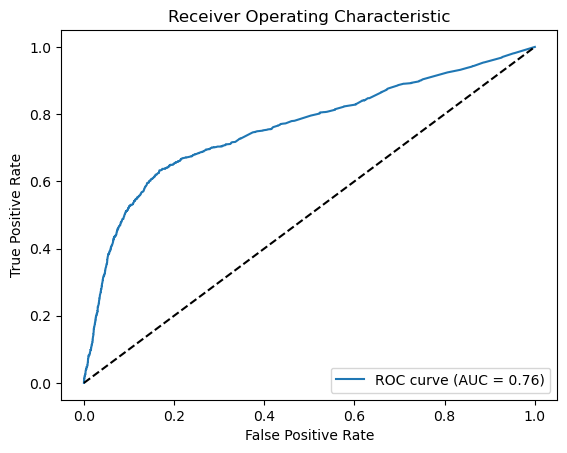

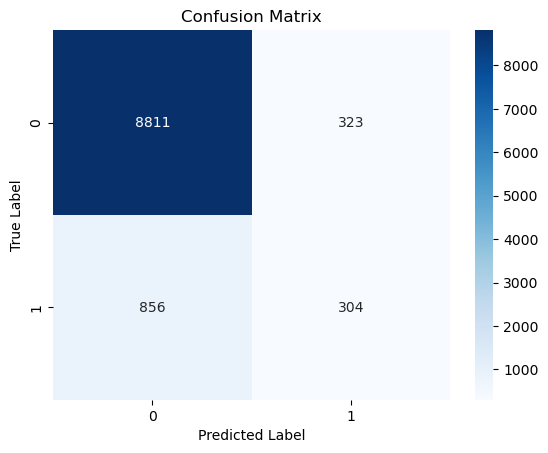

In [27]:
# Generate ROC curve and calculate AUC
y_pred_prob_sc_os = stacking_classifier_os.predict_proba(X_test)[:, 1]
fpr_sc_os, tpr_sc_os, thresholds_sc_os = roc_curve(y_test, y_pred_prob_sc_os)
auc_sc_os = roc_auc_score(y_test, y_pred_prob_sc_os)

# Plot ROC curve
plt.plot(fpr_sc_os, tpr_sc_os, label='ROC curve (AUC = {:.2f})'.format(auc_sc_os))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_sc_os = stacking_classifier_os.predict(X_test)
cm_sc_os = confusion_matrix(y_test, y_pred_sc_os)

# Visualize confusion matrix
sns.heatmap(cm_sc_os, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()